In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 데이터 변수 설명
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준의 신용도
    - => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [2]:
DATA_DIR = './data'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

TRAIN_PATH = os.path.join(DATA_DIR, TRAIN_DATA)
TEST_PATH = os.path.join(DATA_DIR, TEST_DATA)

In [3]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)
df = df.drop('index', axis=1)

# Train Data 와 Test Data 의 개수
number_of_train_data = df_train.shape[0]
number_of_test_data = df_test.shape[0]

# credit 값을 범주형으로 생각, object 타입으로 바꾸고 one hot 인코딩
y_train_data = pd.DataFrame(df['credit'][:number_of_train_data].astype(int).astype(str))
y_train_data_onehot = pd.get_dummies(y_train_data[["credit"]])

df = df.drop('credit', axis=1)

credit 데이터 (label) : 범주형 값이라고 생각, one hot 인코딩 해준다.

In [4]:
df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
dtype: object

# 결측치 확인

In [5]:
# 결측치 확인
df.isnull().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
dtype: int64

### occyp_type 에 결측치가 많은 것을 확인 -> occyp_type이 credit에 얼마나 영향을 미치는지 파악해본다.

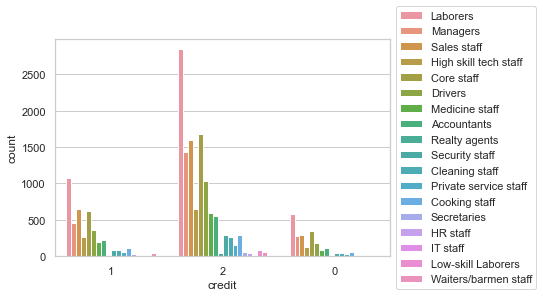

In [6]:
temp_df = pd.merge(df["occyp_type"], y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue="occyp_type", data=temp_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

각 credit에서 비슷한 분포를 보이고 있다

In [7]:
pd.DataFrame(df_train.groupby("occyp_type")["gender"].count())

gender
occyp_type                   
Accountants               902
Cleaning staff            403
Cooking staff             457
Core staff               2646
Drivers                  1575
HR staff                   62
High skill tech staff    1040
IT staff                   41
Laborers                 4512
Low-skill Laborers        127
Managers                 2167
Medicine staff            864
Private service staff     243
Realty agents              63
Sales staff              2539
Secretaries                97
Security staff            424
Waiters/barmen staff      124

<AxesSubplot:xlabel='occyp_type'>

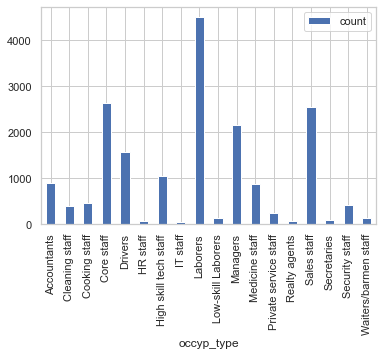

In [8]:
pd.DataFrame(df_train.groupby("occyp_type")["gender"].count()).rename(columns={"gender":"count"}).plot(kind='bar')

Laborers, Core staff, Sales staff, Managers 가 다수임을 확인할 수 있다.

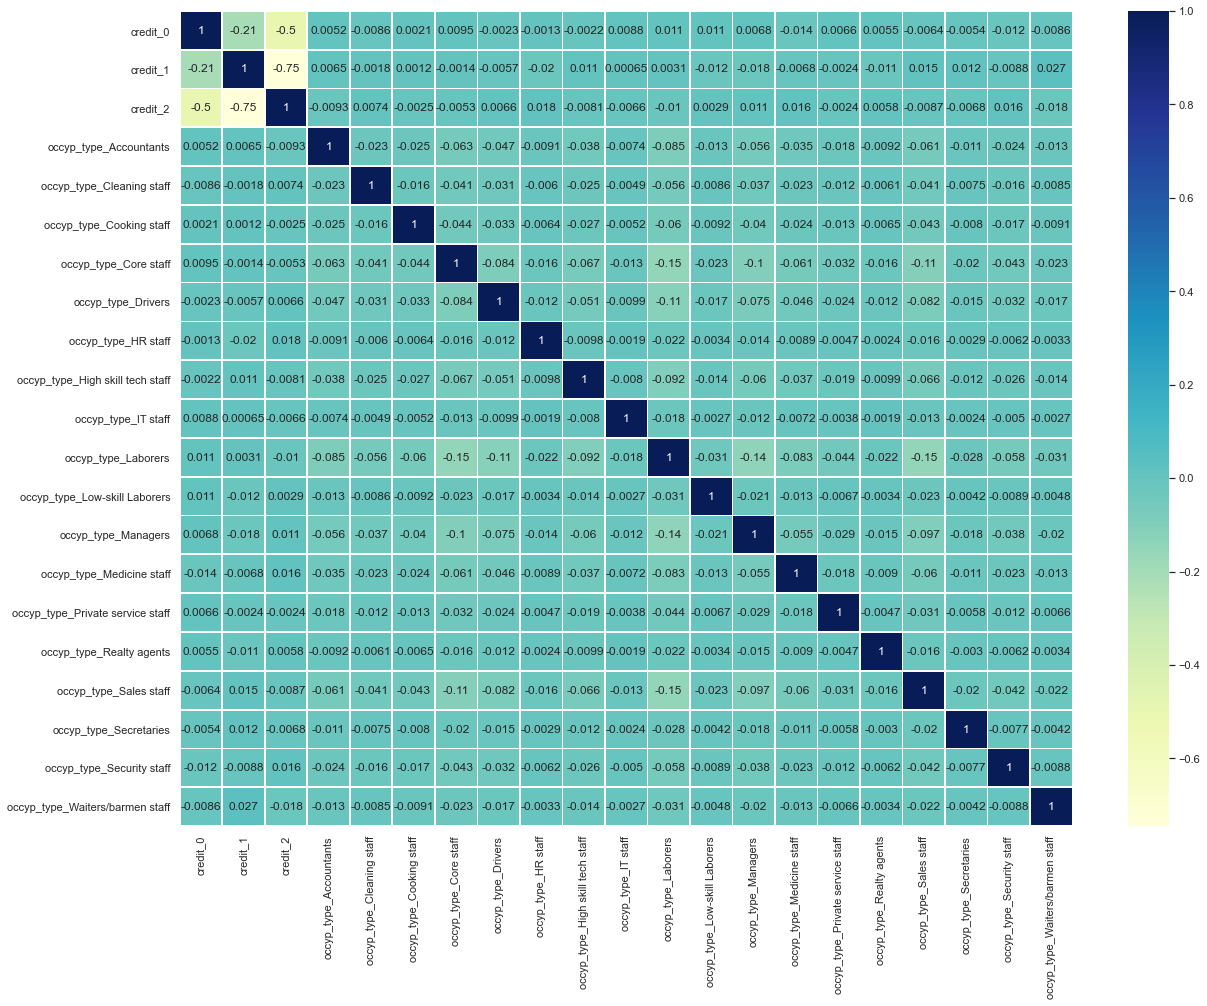

In [9]:
temp_df = pd.merge(y_train_data_onehot, pd.get_dummies(df[["occyp_type"]]), left_index=True, right_index=True)
corr = temp_df.corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

눈에 띄게 상관관계를 가지는 것은 볼 수 없다.<br>
mean encoding 으로 상관관계를 확인해본다.

In [10]:
temp_df = pd.merge(df["occyp_type"], y_train_data_onehot, left_index=True, right_index=True)

print(temp_df.groupby("occyp_type")['credit_0'].mean(), "\n")
print(temp_df.groupby("occyp_type")['credit_1'].mean(), "\n")
print(temp_df.groupby("occyp_type")['credit_2'].mean())

occyp_type
Accountants              0.130820
Cleaning staff           0.099256
Cooking staff            0.126915
Core staff               0.131141
Drivers                  0.118730
HR staff                 0.112903
High skill tech staff    0.118269
IT staff                 0.195122
Laborers                 0.129876
Low-skill Laborers       0.173228
Managers                 0.129211
Medicine staff           0.096065
Private service staff    0.144033
Realty agents            0.158730
Sales staff              0.115400
Secretaries              0.092784
Security staff           0.091981
Waiters/barmen staff     0.080645
Name: credit_0, dtype: float64 

occyp_type
Accountants              0.251663
Cleaning staff           0.230769
Cooking staff            0.240700
Core staff               0.235072
Drivers                  0.227302
HR staff                 0.064516
High skill tech staff    0.259615
IT staff                 0.243902
Laborers                 0.239805
Low-skill Laborers       0.

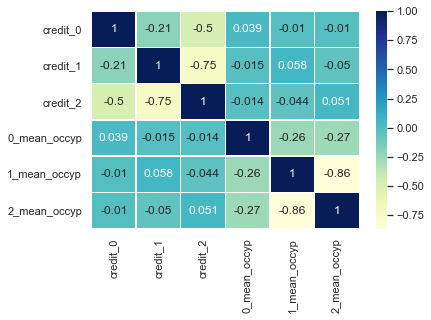

In [11]:
temp_df["0_mean_occyp"] = temp_df["occyp_type"].replace(temp_df.groupby("occyp_type")["credit_0"].mean())
temp_df["1_mean_occyp"] = temp_df["occyp_type"].replace(temp_df.groupby("occyp_type")["credit_1"].mean())
temp_df["2_mean_occyp"] = temp_df["occyp_type"].replace(temp_df.groupby("occyp_type")["credit_2"].mean())

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True,  linewidths=.5, cmap="YlGnBu")

mean 인코딩으로 상관관계를 보았을 때도 뚜렷한 상관관계를 볼 수 없었다.<br>
-> occyp_type 의 값은 빼버리는 것을 고려.

## 각 컬럼의 값 종류 개수 확인

In [12]:
temp_df = df.drop("occyp_type", axis=1)
print(temp_df.apply(lambda x: len(x.unique())))

gender              2
car                 2
reality             2
child_num           9
income_total      265
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       7183
DAYS_EMPLOYED    3640
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
family_size        10
begin_month        61
dtype: int64


- FLAG_MOBIL 은 모두 같은 값으로 삭제

In [13]:
main_df = df.drop(["occyp_type","FLAG_MOBIL"], axis=1)
main_df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
work_phone         int64
phone              int64
email              int64
family_size      float64
begin_month      float64
dtype: object

### 값의 종류가 2개인 binary 값들 column list 만들기

In [14]:
len_df = main_df.apply(lambda x: len(x.unique()))
binary_col = len_df[len_df == 2].index
binary_col

Index(['gender', 'car', 'reality', 'work_phone', 'phone', 'email'], dtype='object')

### Yes or No 의 답이 0,1로 들어온 것 바꿔주기

In [15]:
main_df = df.drop(["occyp_type","FLAG_MOBIL"], axis=1)
for col_name in binary_col[3:]:
    main_df[col_name] = main_df[col_name].map({0:"N",1:"Y"})

main_df.head(2)

gender car reality  child_num  income_total           income_type  \
0      F   N       N          0      202500.0  Commercial associate   
1      F   N       Y          1      247500.0  Commercial associate   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED work_phone phone email  family_size  begin_month  
0      -13899          -4709          N     N     N          2.0         -6.0  
1      -11380          -1540          N     N     Y          3.0         -5.0

In [16]:
main_df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
work_phone        object
phone             object
email             object
family_size      float64
begin_month      float64
dtype: object

### object 데이터와 numeric 데이터 나누기 (object 중에서 Y/N 데이터들 binary_col 으로 따로 지정)

In [17]:
object_col = main_df.dtypes[main_df.dtypes == object].index
object_col

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'work_phone', 'phone', 'email'],
      dtype='object')

In [18]:
numeric_col = main_df.dtypes[main_df.dtypes != object].index
numeric_col

Index(['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'family_size', 'begin_month'],
      dtype='object')

# object data

## binary_col 에 대해서 one hot encoding 해주기

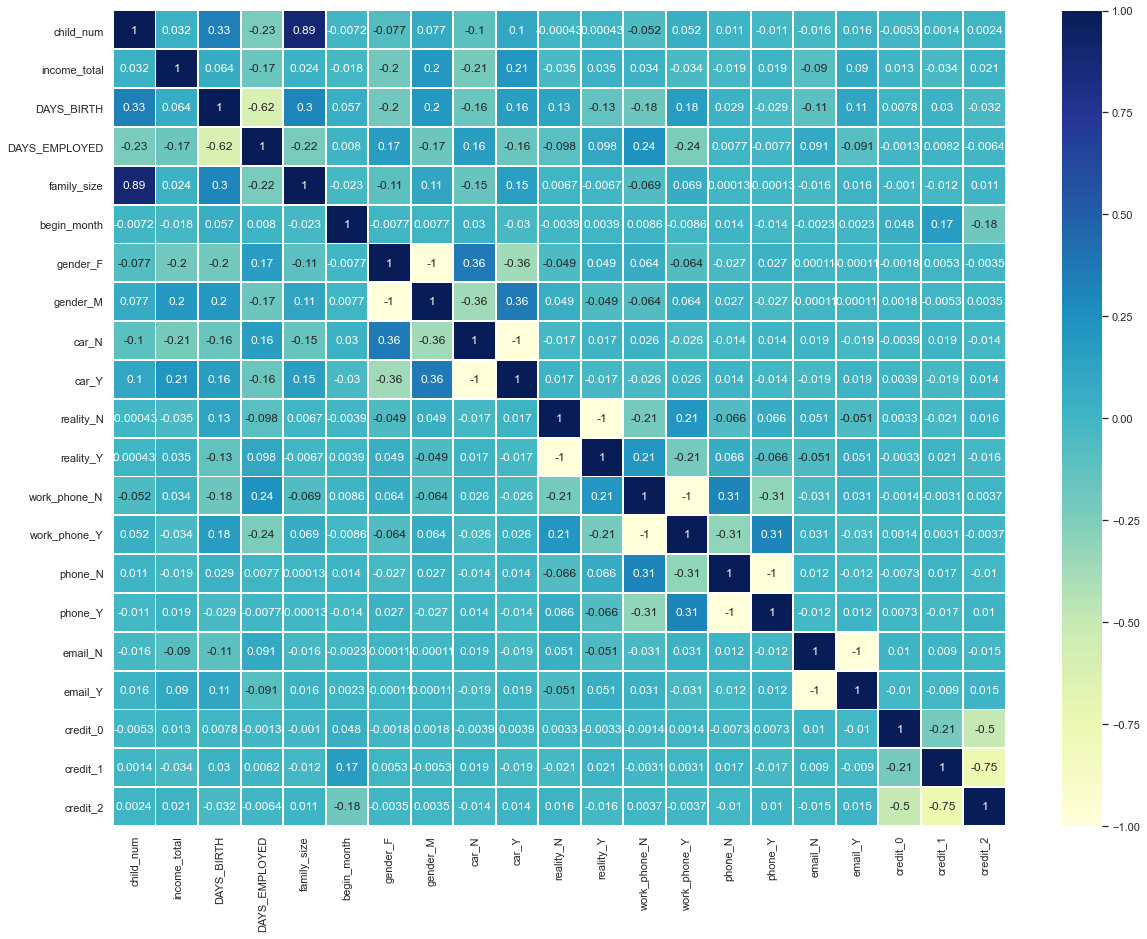

In [19]:
temp_df = main_df.copy()
for col_name in binary_col:
    temp_df = pd.merge(temp_df, pd.get_dummies(main_df[[col_name]]), left_index=True, right_index=True)
# temp_df.head(2)
df_all_b = temp_df

corr = pd.merge(temp_df, y_train_data_onehot, left_index=True, right_index=True).corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,linewidths=.8, cmap="YlGnBu")

- 뚜렷한 상관관계는 보이지 않음.<br><br>

### 나머지 object columns 에도 one hot encoding

In [20]:
col_list = []
for i in object_col:
    if i not in binary_col:
        col_list.append(i)
col_list

['income_type', 'edu_type', 'family_type', 'house_type']

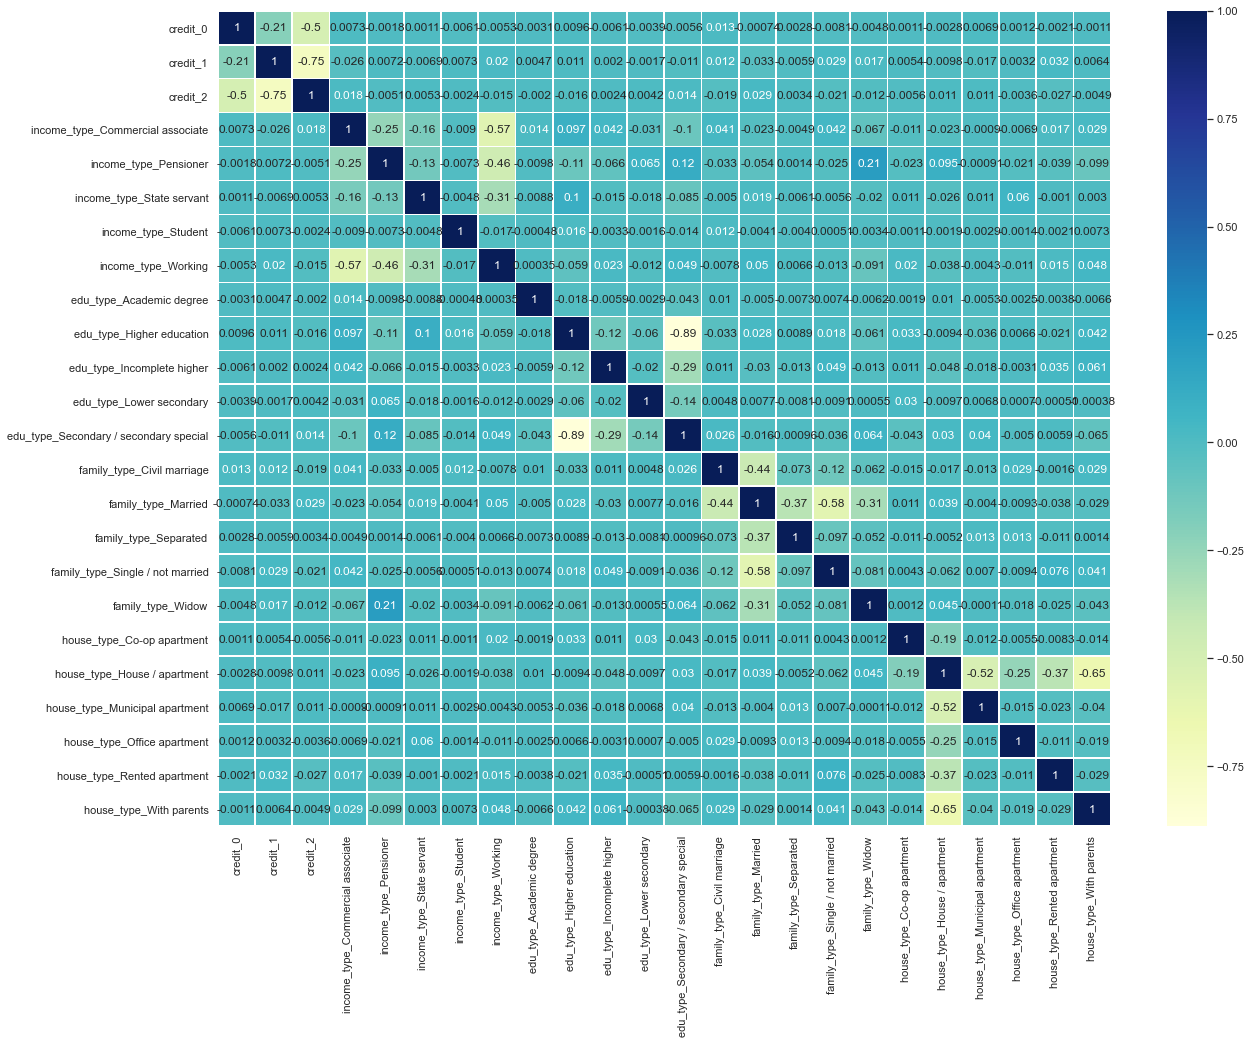

In [21]:
temp_df = df_all_b
for col_name in col_list:
    temp_df = pd.merge(temp_df, pd.get_dummies(main_df[[col_name]]), left_index=True, right_index=True)
df_all = temp_df

temp_list = []
for i in df_all.columns.tolist():
    if i not in df_all_b.columns.tolist():
        temp_list.append(i)

temp_df = pd.merge(y_train_data_onehot, df_all[temp_list], left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,linewidths=.8, cmap="YlGnBu")

- 이것 역시 credit과의 직접적인 상관관계는 보이지 않음

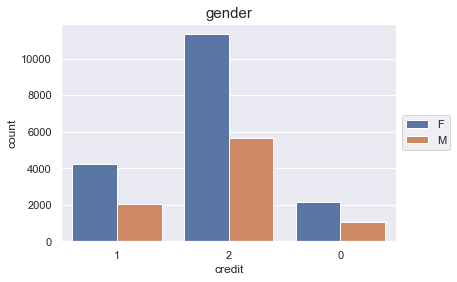

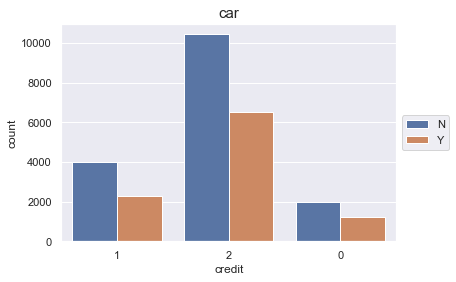

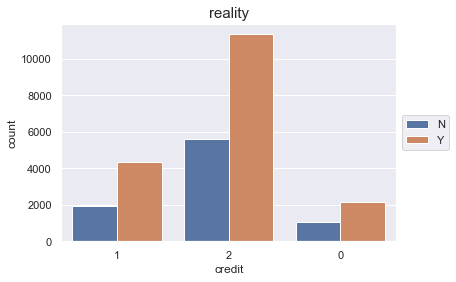

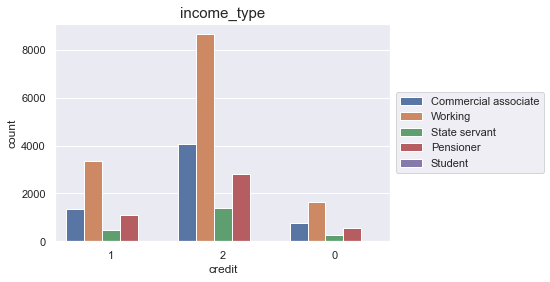

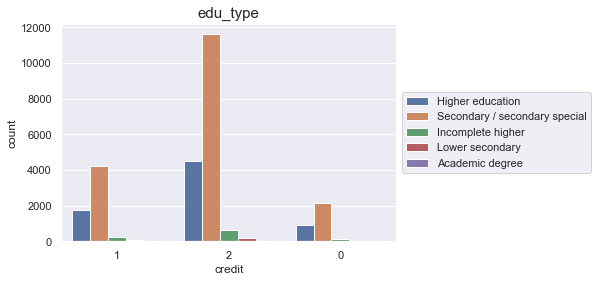

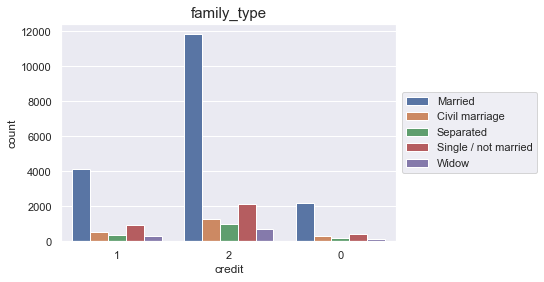

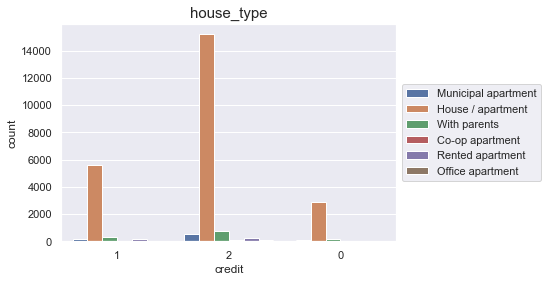

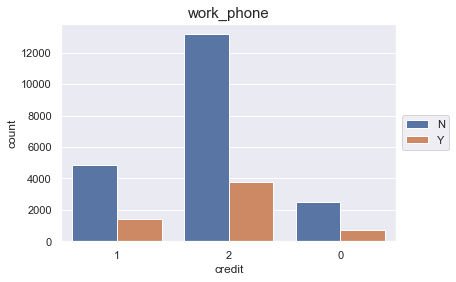

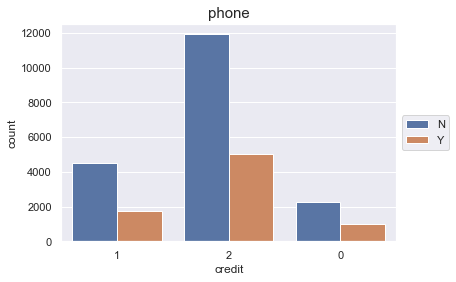

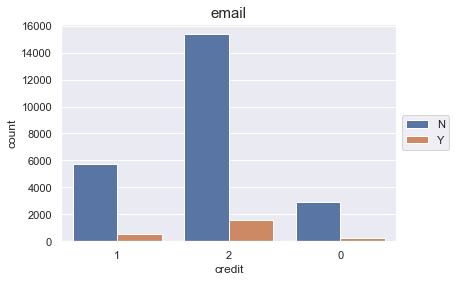

In [22]:
for col_name in object_col:
    temp_df = pd.merge(main_df[col_name], y_train_data, left_index=True, right_index=True)
    sns.countplot(x="credit", hue=col_name, data=temp_df)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(col_name, fontsize=15)
    plt.show()

# numeric data
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- child_num: 자녀 수
- family_size: 가족 규모

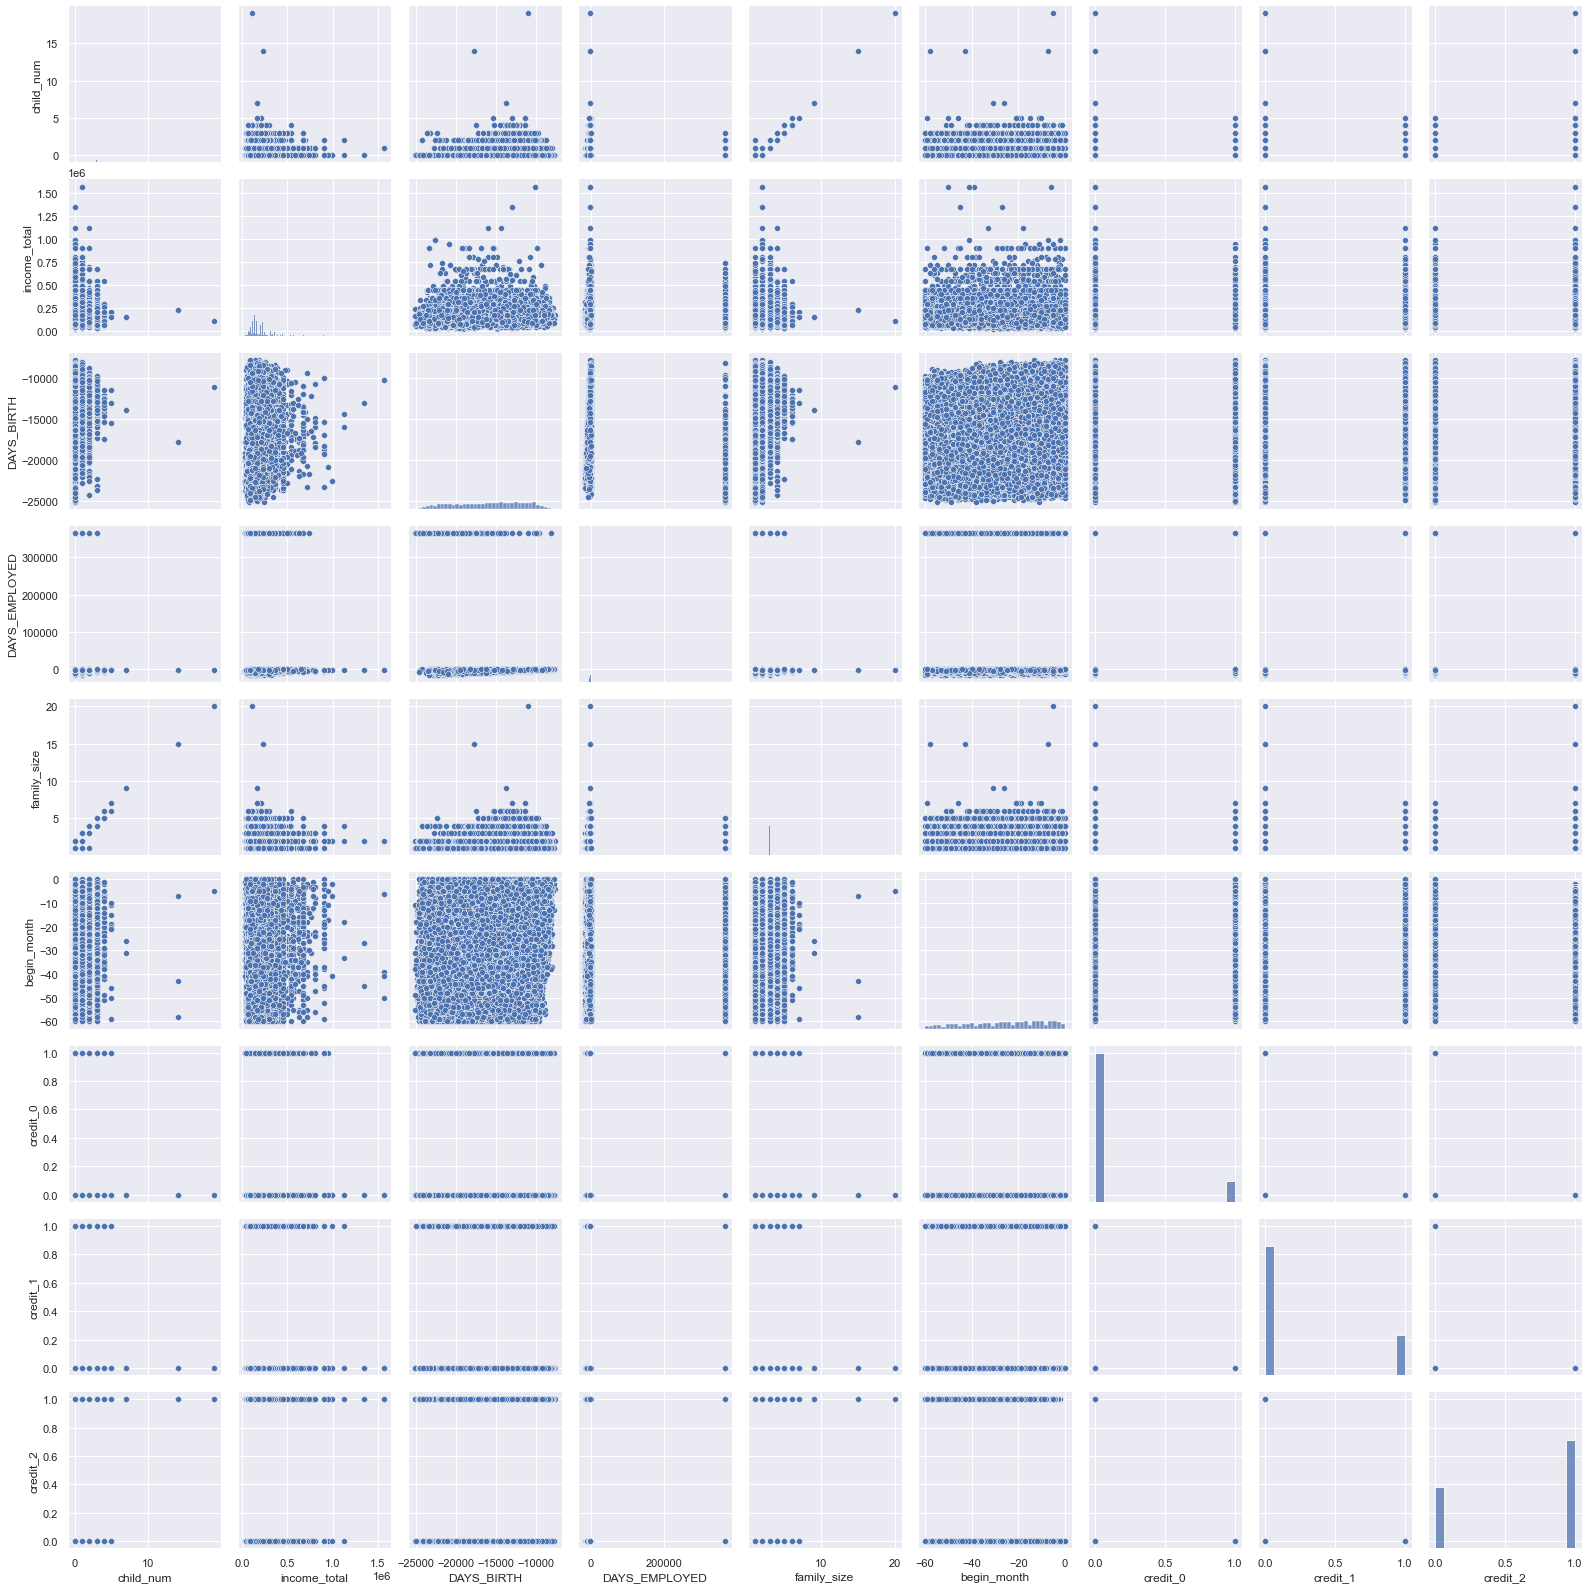

In [23]:
temp_df = pd.merge(main_df[numeric_col], y_train_data_onehot, left_index=True, right_index=True)

sns.pairplot(temp_df)

### numeric data 분포 그려보기

In [24]:
main_df_r = main_df.copy()
df_all_r = df_all.copy()

In [25]:
main_df_r["DAYS_BIRTH"] = main_df[["DAYS_BIRTH"]]*-1
main_df_r["DAYS_EMPLOYED"] = main_df[["DAYS_EMPLOYED"]]*-1
main_df_r["begin_month"] = main_df[["begin_month"]]*-1

In [26]:
df_all_r["DAYS_BIRTH"] = df_all[["DAYS_BIRTH"]]*-1
df_all_r["DAYS_EMPLOYED"] = df_all[["DAYS_EMPLOYED"]]*-1
df_all_r["begin_month"] = df_all[["begin_month"]]*-1

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

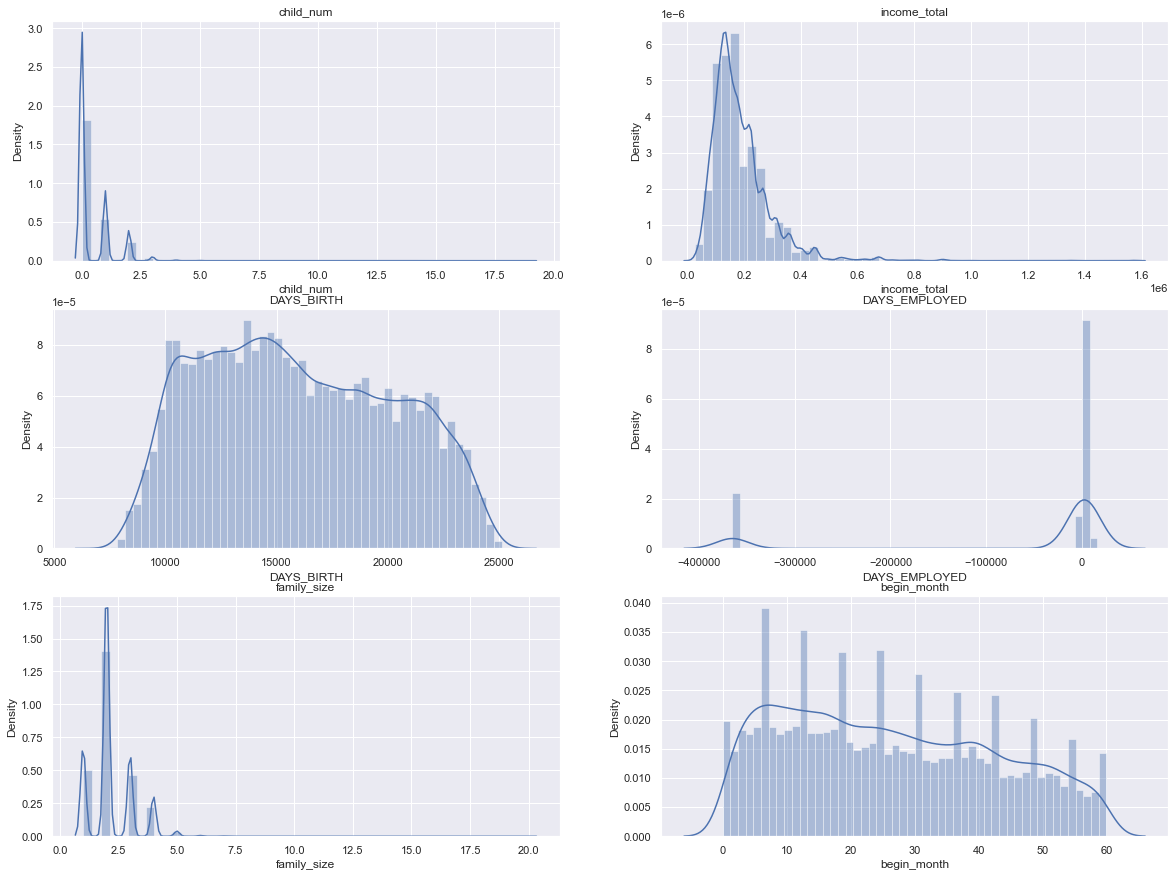

In [27]:
fig = plt.figure()
fig.set_size_inches(20,15) # 싸이즈 설정

ax = []
for i, col_name in enumerate(numeric_col):
    ax.append(fig.add_subplot(3,2,i+1))
    X_1 = main_df_r[col_name]
    
    ax[i] = sns.distplot(X_1, bins=50)
    ax[i].set_title(col_name)

### Log Transform 해보기

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

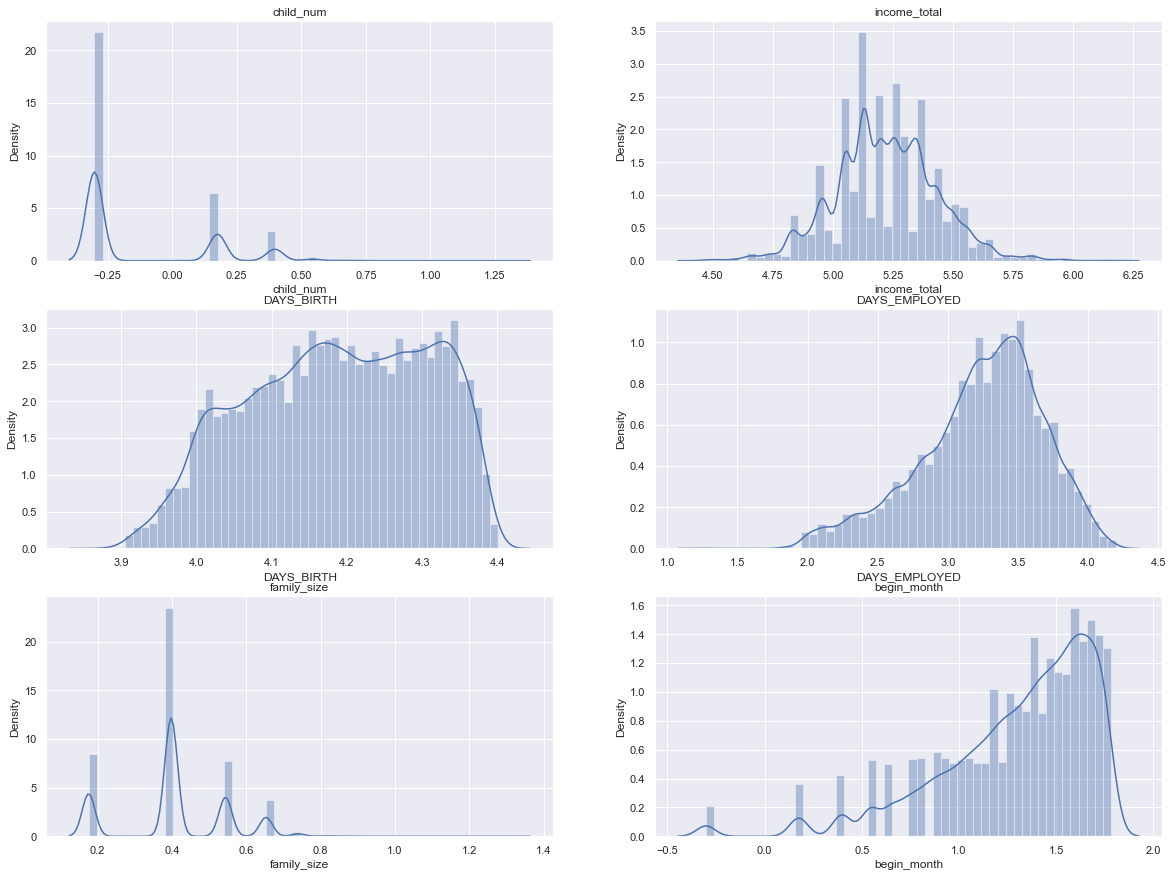

In [28]:
# log transform
fig = plt.figure()
fig.set_size_inches(20,15) # 싸이즈 설정

ax = []
for i, col_name in enumerate(numeric_col):
    ax.append(fig.add_subplot(3,2,i+1))
    X_1 = np.log10(main_df_r[col_name]+0.5)
    
    ax[i] = sns.distplot(X_1, bins=50)
    ax[i].set_title(col_name)

log transform 후 income_total 과 DAYS_EMPLOYED의 데이터 형태가 좋아진것을 확인 -> 상관관계에 영향이 있는지 확인해보기

In [29]:
df_all_r["income_total_log"] = np.log10(df_all_r["income_total"]+0.5)
df_all_r["DAYS_EMPLOYED_log"] = np.log10(df_all_r["income_total"]+0.5)
df_all_r["family_size_log"] = np.log10(df_all_r["income_total"]+0.5)
df_all_r["child_num_log"] = np.log10(df_all_r["income_total"]+0.5)

### income_total 과 log 변환한 값의 상관관계 차이 확인

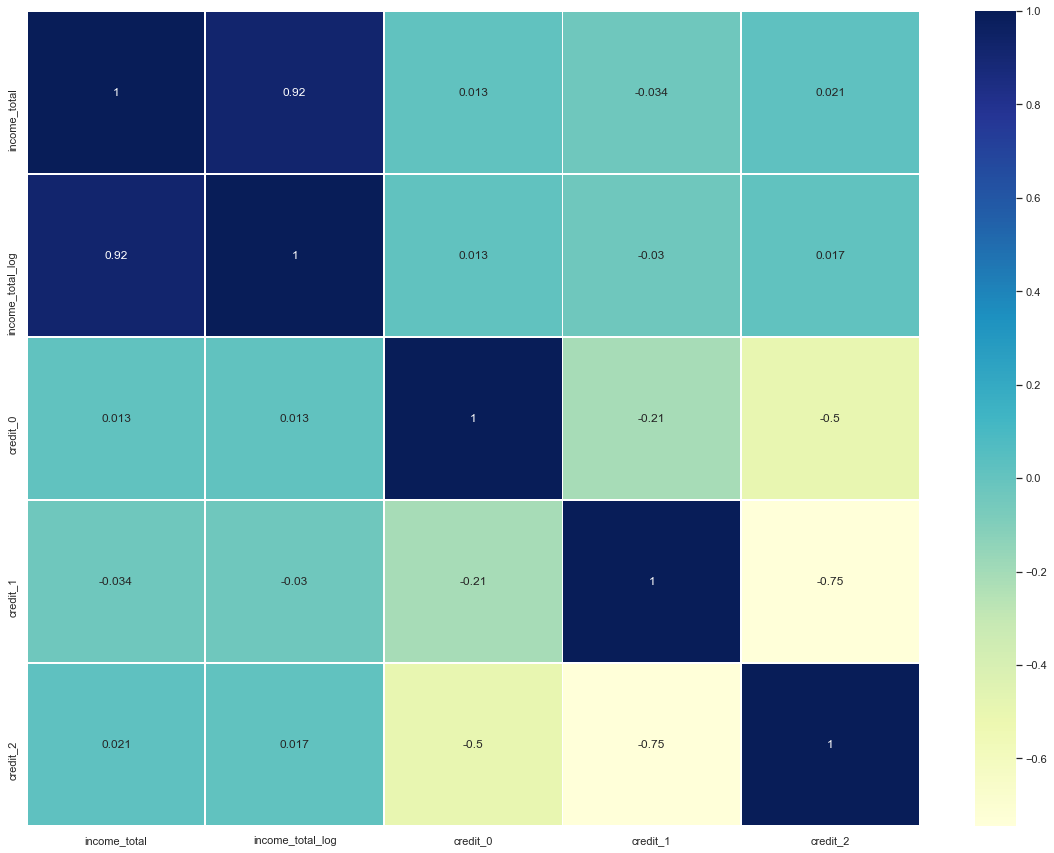

In [30]:
corr = pd.merge(df_all_r[["income_total", "income_total_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

log 변환이 상관관계에 영향을 미치진 않았다

### numeric data 상관관계 뽑아보기

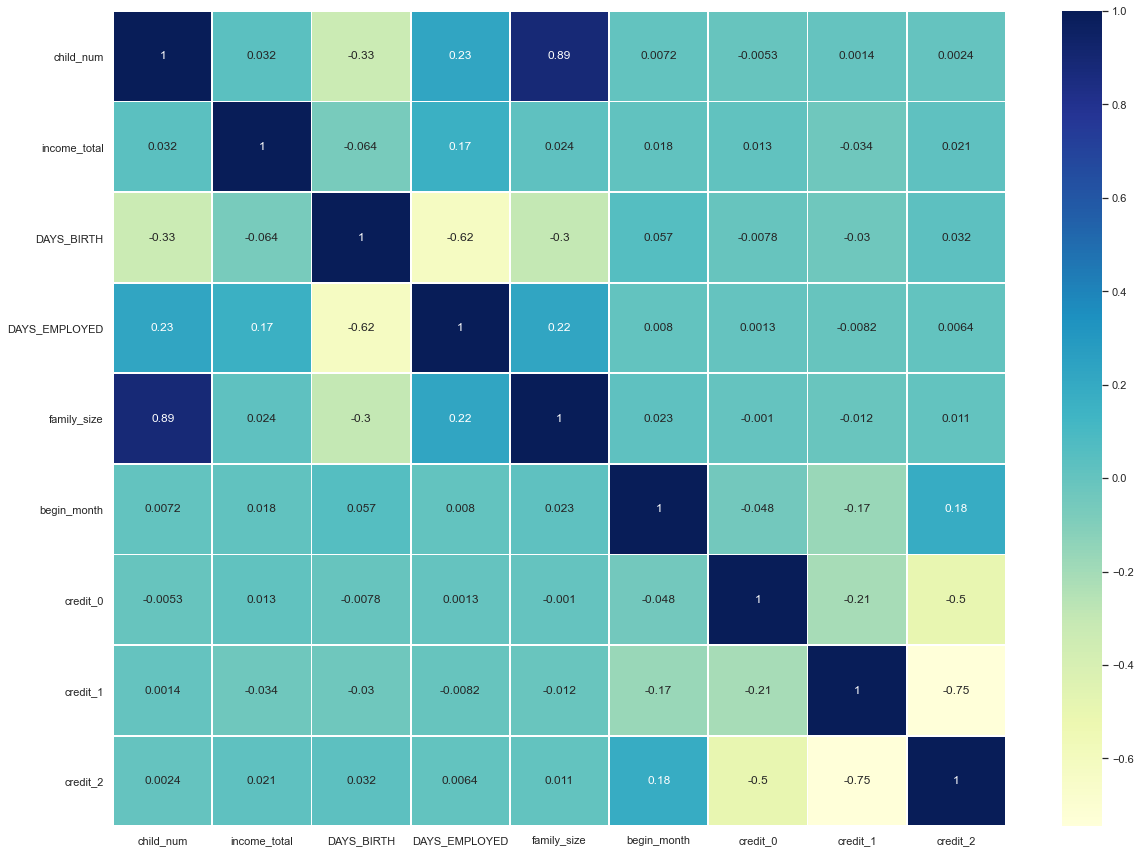

In [31]:
corr = pd.merge(main_df_r[numeric_col], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

(family_size 와 child_num), (DAYS_BIRTH와 DAYS_EMPLOYED) 의 상관관계가 높은 것을 볼 수 있다.

In [32]:
print(main_df_r[["family_size","child_num"]].corr())
print(main_df_r[["DAYS_BIRTH","DAYS_EMPLOYED"]].corr())

             family_size  child_num
family_size     1.000000   0.889114
child_num       0.889114   1.000000
               DAYS_BIRTH  DAYS_EMPLOYED
DAYS_BIRTH       1.000000      -0.616213
DAYS_EMPLOYED   -0.616213       1.000000


### family_size와 child_num의 credit과 상관관계 뽑아보기

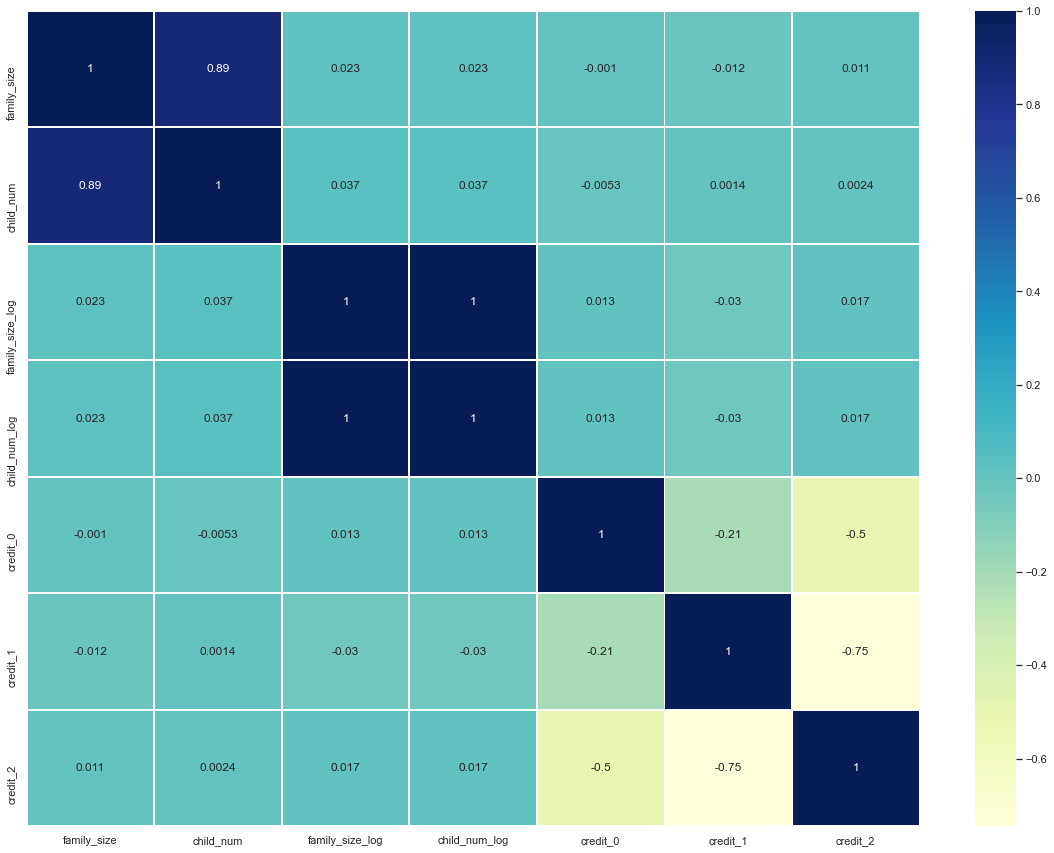

In [33]:
corr = pd.merge(df_all_r[["family_size","child_num","family_size_log","child_num_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

family_size 와 child_num 모두 log 변환 해준 것이 더 높은 상관관계를 보였고, 두 가지의 상관관계는 정확히 똑같음을 알 수 있다. <br>
-> family_size_log 값만 사용하겠다.

### DAYS_EMPLOYED 분석

<AxesSubplot:>

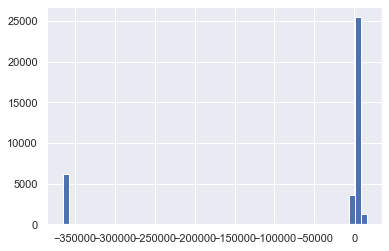

In [34]:
df_all_r["DAYS_EMPLOYED"].hist(bins=50)

음수값 -> 고용되지 않은 상태 -> 고용된 상태와 고용되지 않은 상태로 나눠보기

In [35]:
df_all_r["is_employed"] = df_all_r["DAYS_EMPLOYED"].map(lambda x: "N" if x < 0 else "Y").astype(object)
df_all_r["is_employed"]

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
36452    Y
36453    Y
36454    Y
36455    Y
36456    Y
Name: is_employed, Length: 36457, dtype: object

In [36]:
df_all_r = pd.merge(df_all_r, pd.get_dummies(df_all_r[["is_employed"]]), left_index=True, right_index=True)
df_all_r.head()

gender car reality  child_num  income_total           income_type  \
0      F   N       N          0      202500.0  Commercial associate   
1      F   N       Y          1      247500.0  Commercial associate   
2      M   Y       Y          0      450000.0               Working   
3      F   N       Y          0      202500.0  Commercial associate   
4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  ...  house_type_Office apartment house_type_Rented apartment  \
0       13899  ...                            0                           0   
1       11380  ...                            0                           0   
2       19087  ...                            0                           0   
3       15088  ...                            0                           0   
4       15037  ...                            0                           0   

  house_type_With parents income_total_log  DAYS_EMPLOYED_log  \
0                       0         5.306426           5.306426   
1                       0         5.393576           5.393576   
2                       0         5.653213           5.653213   
3                       0         5.306426           5.306426   
4                       0         5.197282           5.197282   

   family_size_log  child_num_log  is_employed  is_employed_N  is_employed_Y  
0         5.306426       5.306426            Y              0              1  
1         5.393576       5.393576            Y              0              1  
2         5.653213       5.653213            Y              0              1  
3         5.306426       5.306426            Y              0              1  
4         5.197282       5.197282            Y              0              1  

[5 rows x 56 columns]

### DAYS_EMPLOYED, Log Transform, is_employed 상관관계

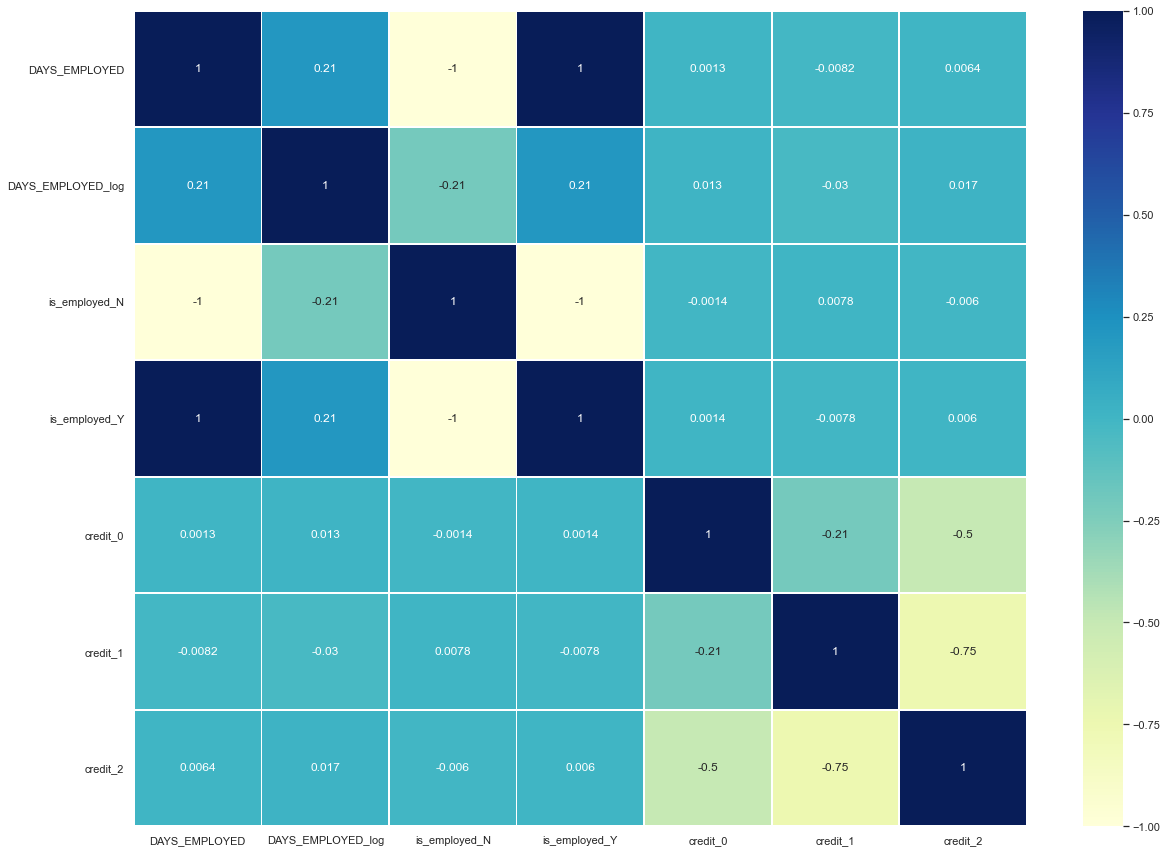

In [37]:
corr = pd.merge(df_all_r[["DAYS_EMPLOYED","DAYS_EMPLOYED_log","is_employed_N", "is_employed_Y"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- is_employed 값이 상관관계를 더 올려주진 않는다.
- log 변환 해준것이 상관관계를 조금이나마 올려주었다.

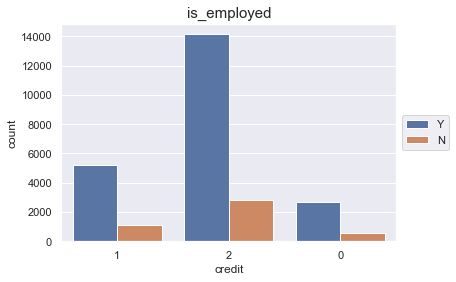

In [38]:
temp_df = pd.merge(df_all_r["is_employed"], y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue="is_employed", data=temp_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("is_employed", fontsize=15)
plt.show()

### DAYS_EMPLOYED 음수값 없애보기

<AxesSubplot:>

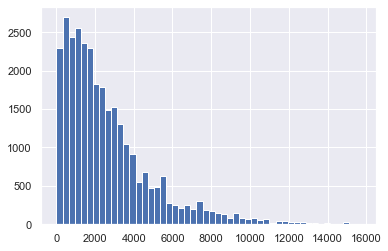

In [39]:
# 음수값 빼고 해보기
df_all_r["EMPLOYED_UP"] = df_all_r["DAYS_EMPLOYED"][df_all_r["DAYS_EMPLOYED"] >= 0]
df_all_r["EMPLOYED_UP"].hist(bins=50)

<AxesSubplot:>

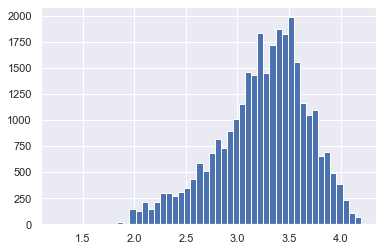

In [40]:
df_all_r["EMPLOYED_UP_log"] = np.log10(df_all_r["EMPLOYED_UP"]+0.5)
df_all_r["EMPLOYED_UP_log"].hist(bins=50)

In [41]:
df_all_r["EMPLOYED_UP"]

0         4709.0
1         1540.0
2         4434.0
3         2092.0
4         2105.0
          ...   
36452     5434.0
36453     1315.0
36454    14018.0
36455     1085.0
36456      187.0
Name: EMPLOYED_UP, Length: 36457, dtype: float64

### EMPLOYED_UP 상관관계

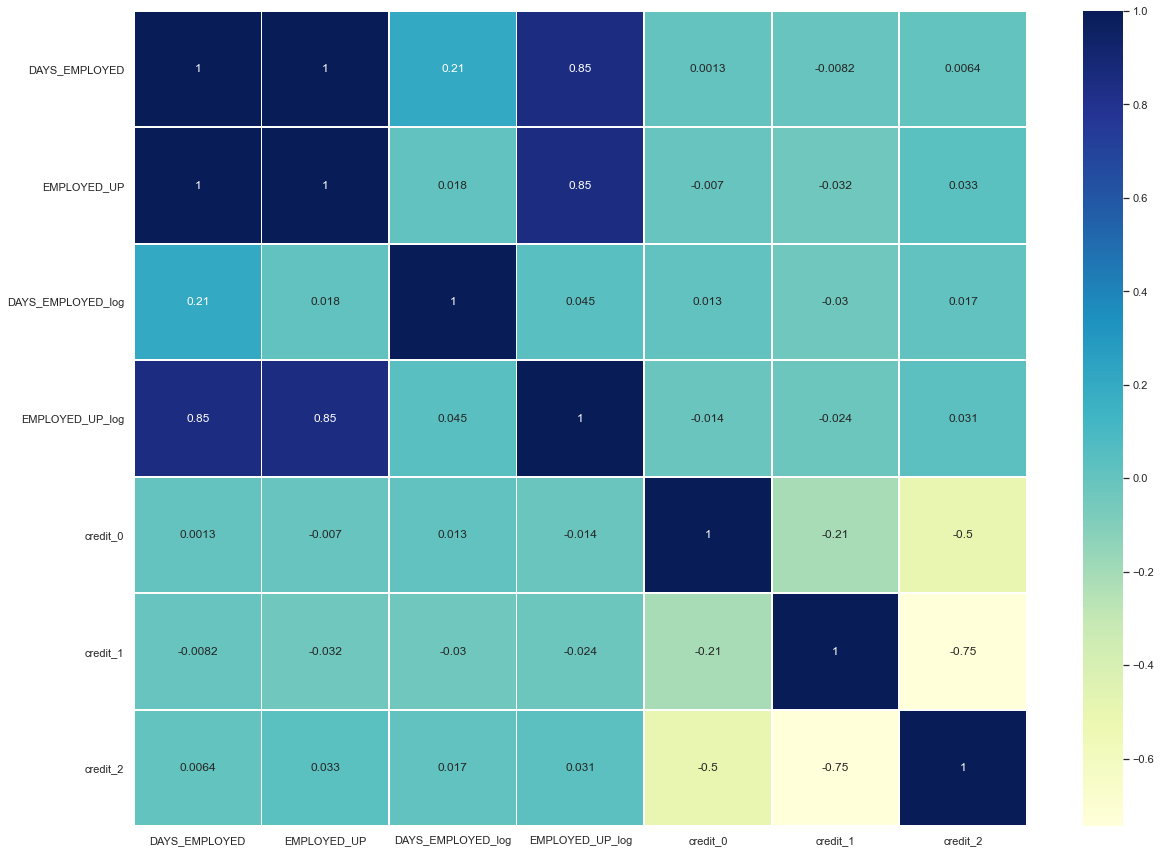

In [42]:
corr = pd.merge(df_all_r[["DAYS_EMPLOYED","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- 양의 값만 뽑아낸 것(EMPLOYED_UP)이 그나마 상관관계를 올려줌 -> 음수 값은 어떻게 처리할 것인가(현재는 null). 0? 최대값? 최빈값?

#### 0 으로 대체 하였을 때

In [43]:
df_all_r["EMPLOYED_UP_zero"] = df_all_r["EMPLOYED_UP"].fillna(0)
df_all_r["EMPLOYED_UP_zero_log"] = np.log10(df_all_r["EMPLOYED_UP_zero"]+0.5)

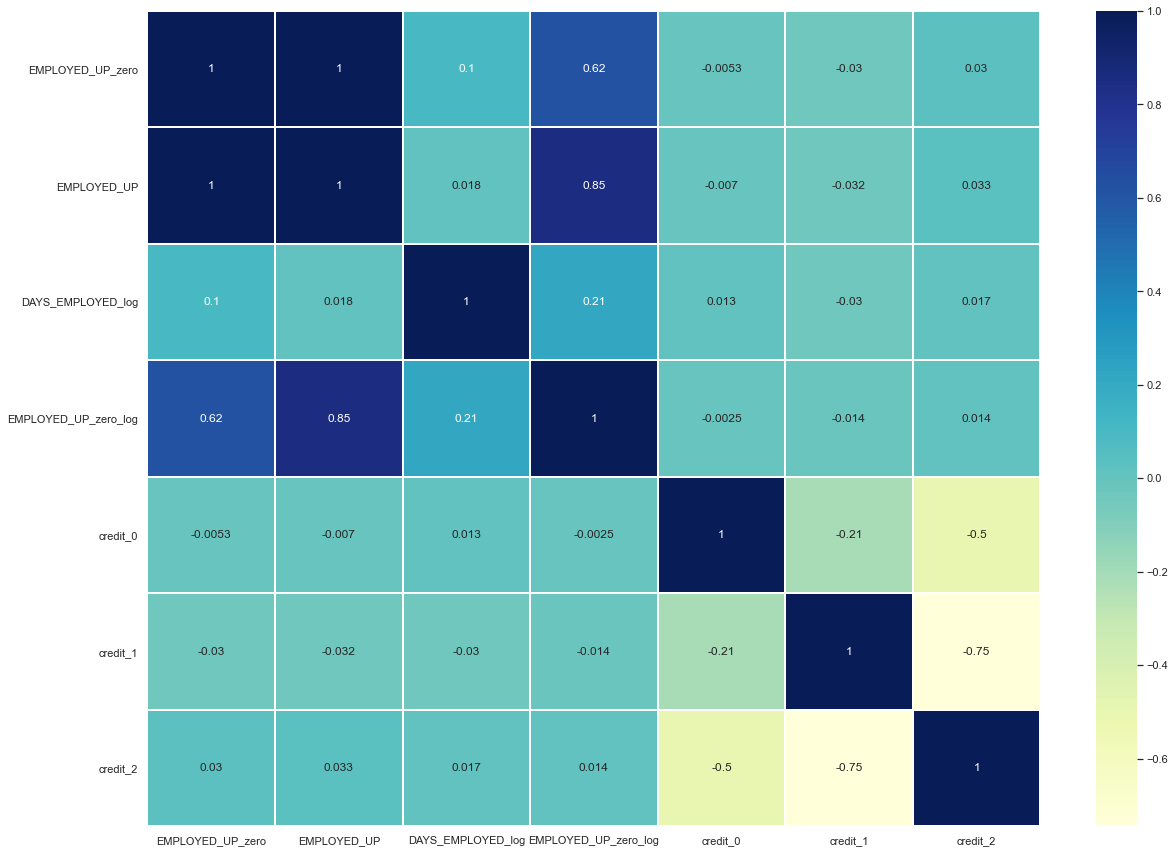

In [44]:
corr = pd.merge(df_all_r[["EMPLOYED_UP_zero","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_zero_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

#### 평균값 으로 대체 하였을 때

In [45]:
df_all_r["EMPLOYED_UP_mean"] = df_all_r["EMPLOYED_UP"].fillna(df_all_r["EMPLOYED_UP"].mean())
df_all_r["EMPLOYED_UP_mean_log"] = np.log10(df_all_r["EMPLOYED_UP_mean"]+0.5)

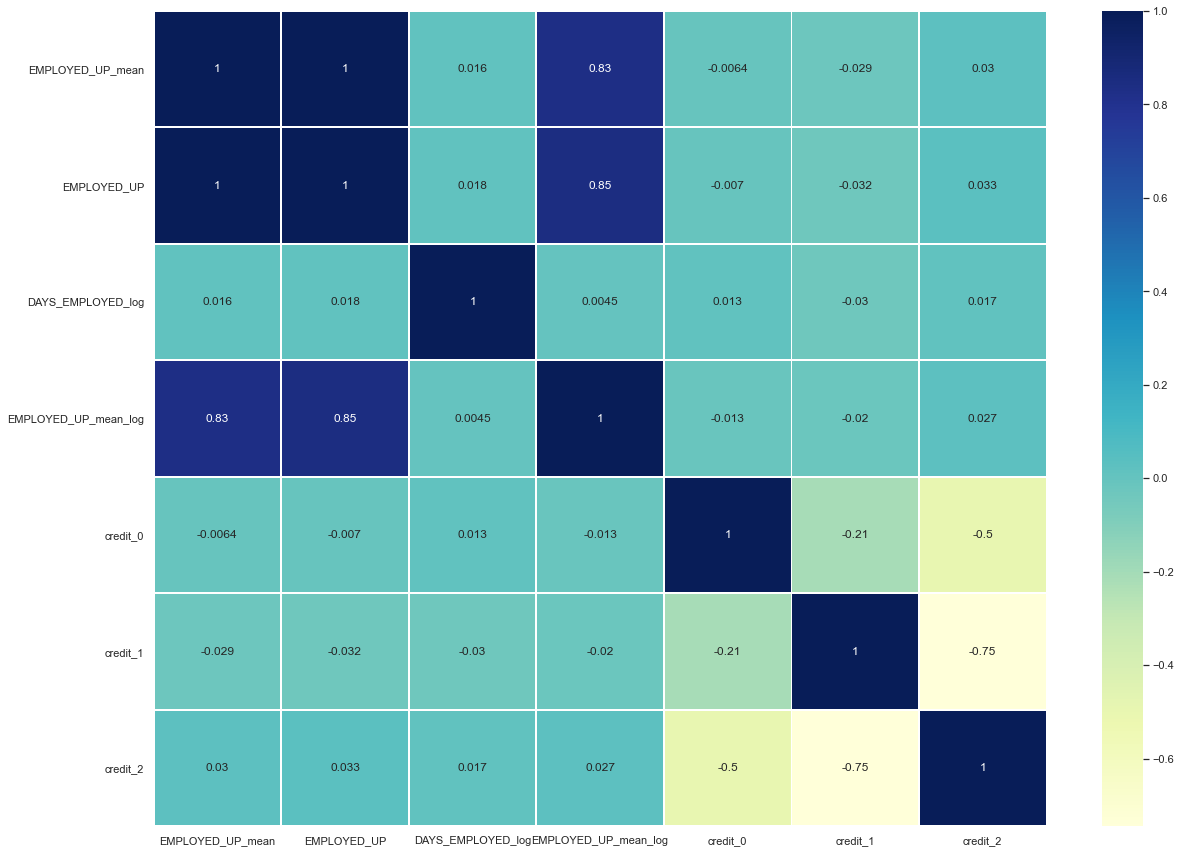

In [46]:
corr = pd.merge(df_all_r[["EMPLOYED_UP_mean","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_mean_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

#### 최댓값으로 으로 대체 하였을 때

In [47]:
df_all_r["EMPLOYED_UP_max"] = df_all_r["EMPLOYED_UP"].fillna(df_all_r["EMPLOYED_UP"].max())
df_all_r["EMPLOYED_UP_max_log"] = np.log10(df_all_r["EMPLOYED_UP_max"]+0.5)

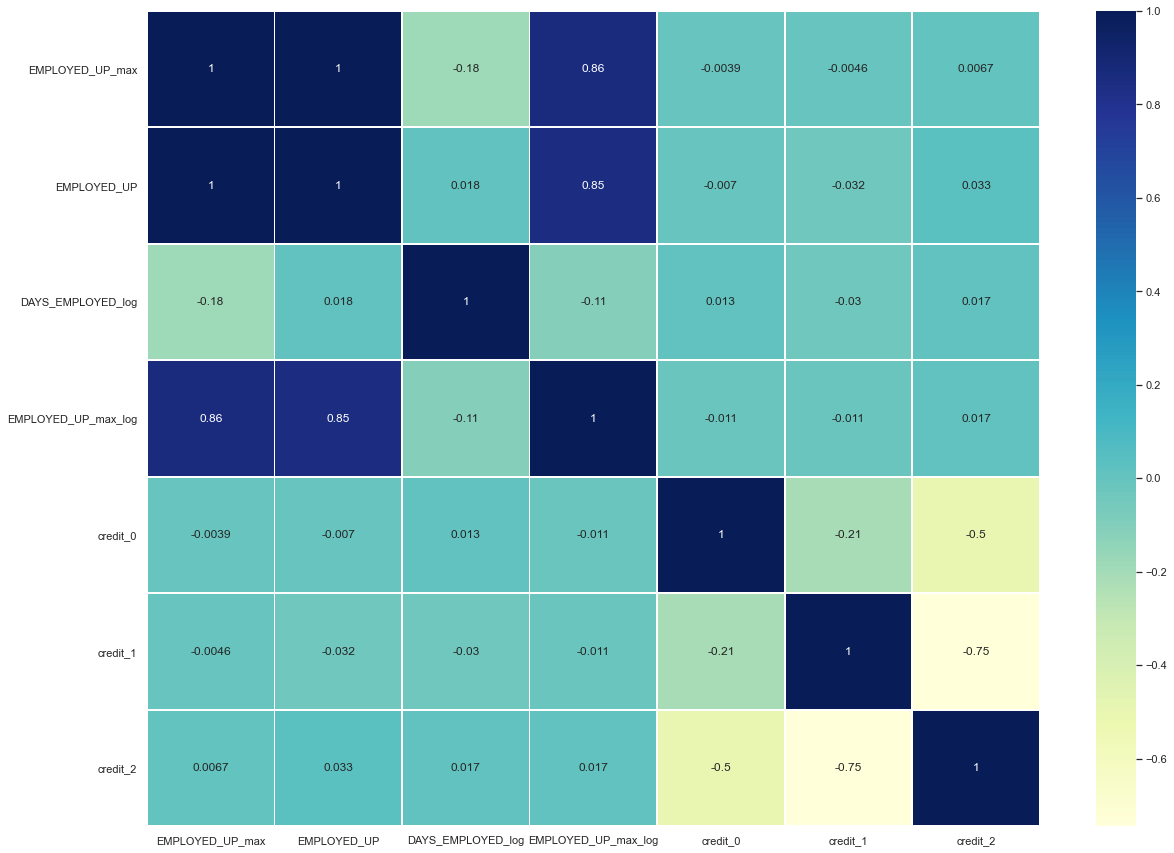

In [48]:
corr = pd.merge(df_all_r[["EMPLOYED_UP_max","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_max_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

#### 최빈값 으로 대체 하였을 때

In [49]:
df_all_r["EMPLOYED_UP_mode"] = df_all_r["EMPLOYED_UP"].fillna(df_all_r["EMPLOYED_UP"].mode().values[0])
df_all_r["EMPLOYED_UP_mode_log"] = np.log10(df_all_r["EMPLOYED_UP_mode"]+0.5)

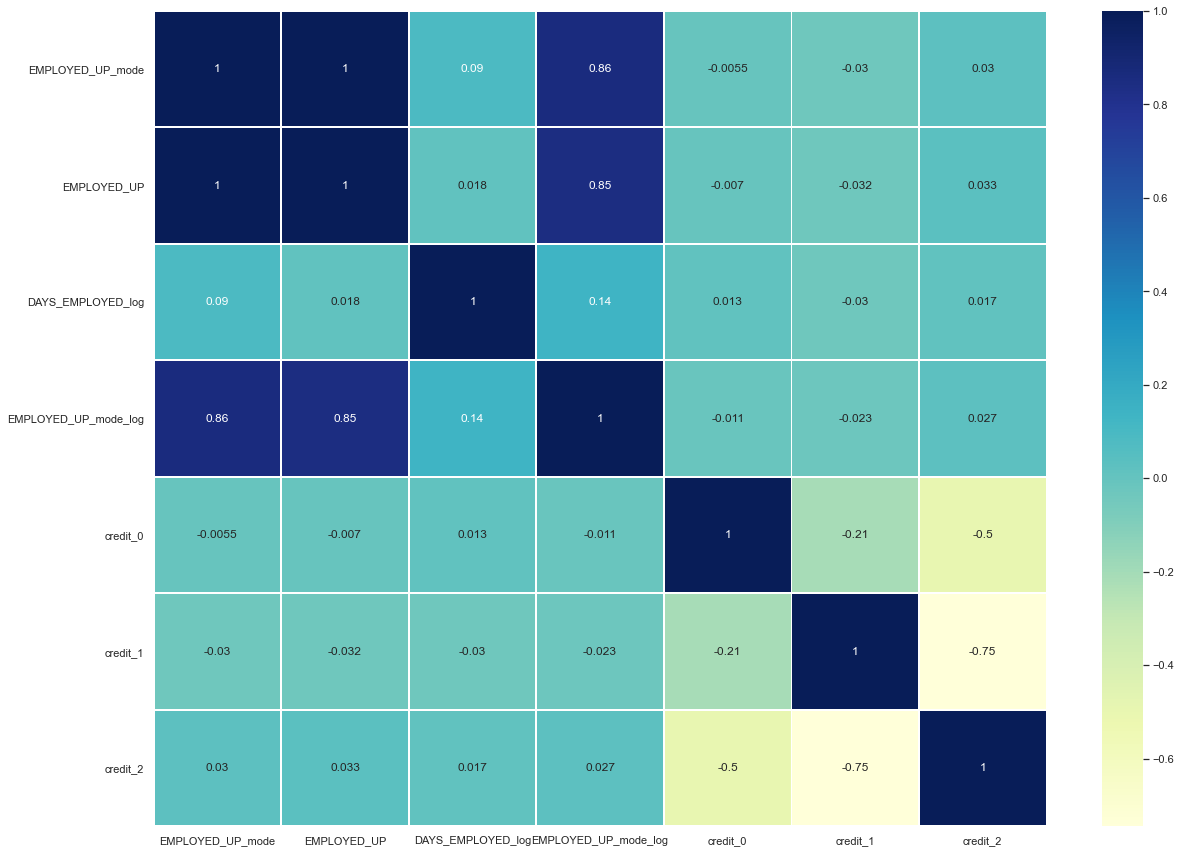

In [50]:
corr = pd.merge(df_all_r[["EMPLOYED_UP_mode","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_mode_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- mean, zero, max, mode 다 넣어본 결과, max 빼고는 다 비슷, 데이터의 의미상 zero가 나은 것 같다.

# 여러가지 합치기

## 수입과의 관계

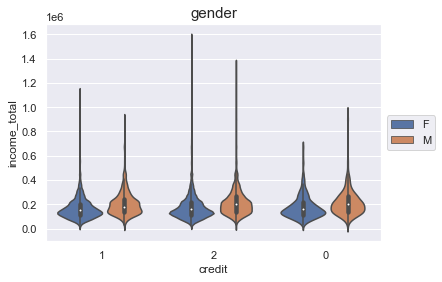

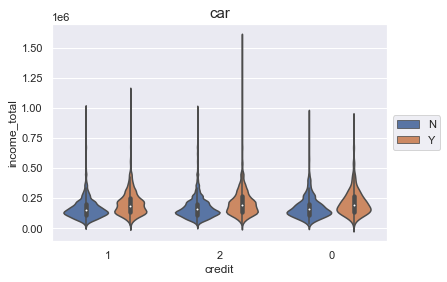

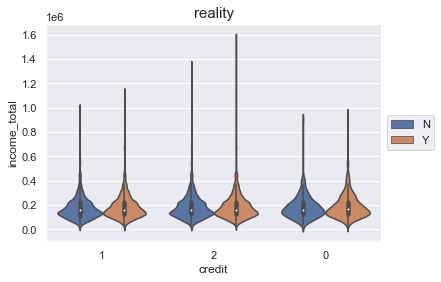

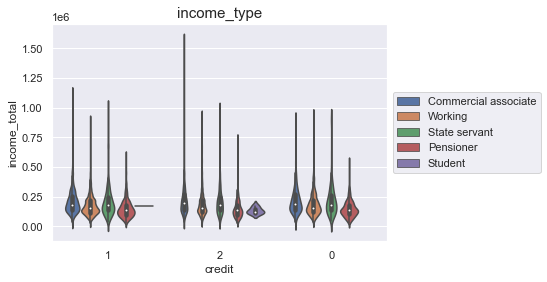

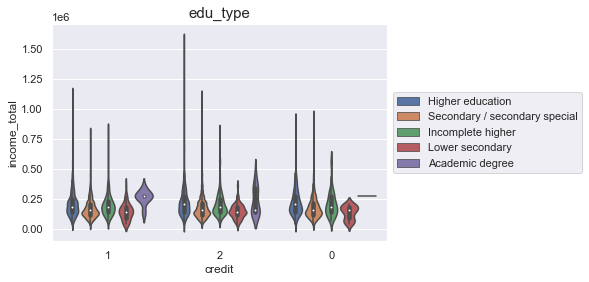

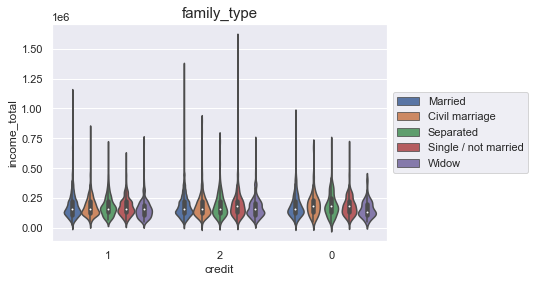

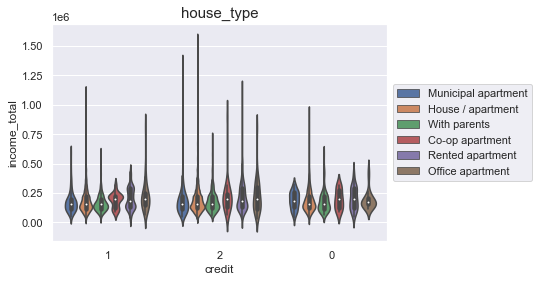

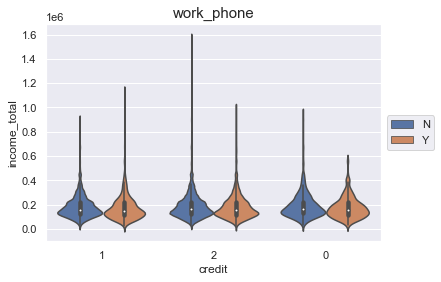

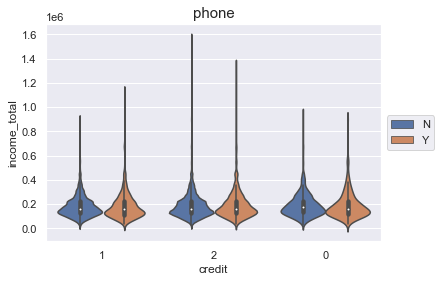

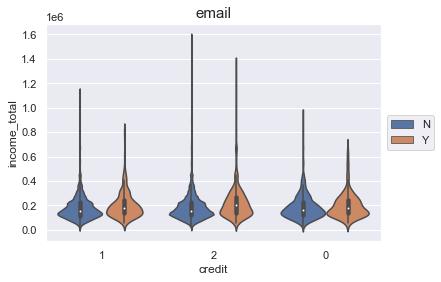

In [51]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)

for col_name in object_col:
    sns.violinplot(x="credit", y="income_total", hue=col_name, data=temp_df, split=False)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(col_name, fontsize=15)
    plt.show()

## 신용카드 발급 나이에 따른 신용등급?

In [52]:
df_all_r["create_age"]  = (df_all_r["DAYS_BIRTH"] - df_all_r["begin_month"]*30)/365

In [53]:
temp_df = pd.merge(df_all_r[["create_age"]], y_train_data_onehot, left_index=True, right_index=True)
temp_df.corr()

create_age  credit_0  credit_1  credit_2
create_age    1.000000 -0.002082 -0.009595  0.009925
credit_0     -0.002082  1.000000 -0.207469 -0.497962
credit_1     -0.009595 -0.207469  1.000000 -0.745018
credit_2      0.009925 -0.497962 -0.745018  1.000000

<AxesSubplot:>

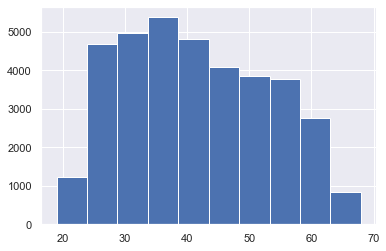

In [54]:
df_all_r["create_age"].hist()

<AxesSubplot:>

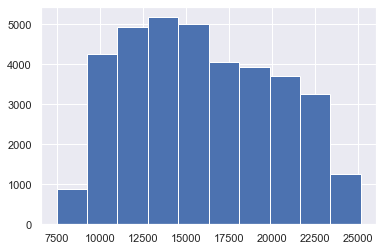

In [55]:
df_all_r["DAYS_BIRTH"].hist()

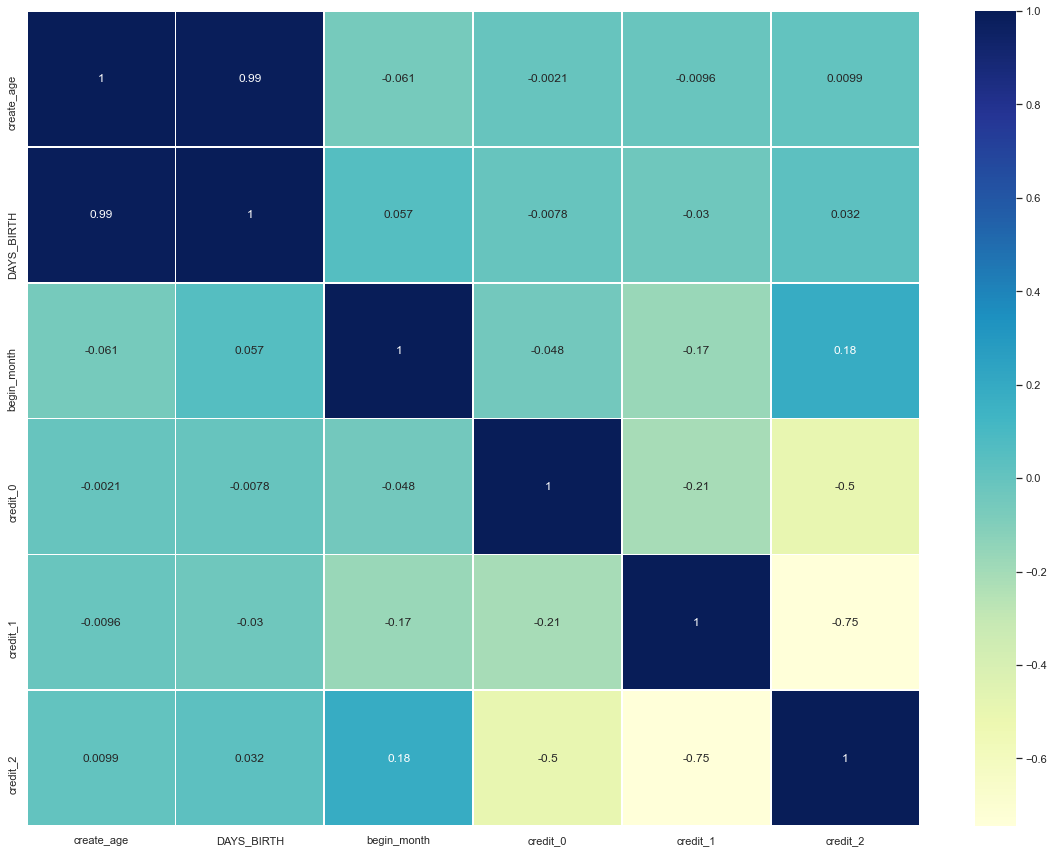

In [56]:
temp_df = pd.merge(df_all_r[["create_age","DAYS_BIRTH","begin_month"]], y_train_data_onehot, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- 상관관계는 볼 수 없다.

In [57]:
bins = [0, 20,30,40,50,60,70]
group_names = ['10s', '20s', '30s','40s','50s','60s']
df_all_r["create_age_bin"] = pd.cut(df_all_r['create_age'], bins, labels=group_names)

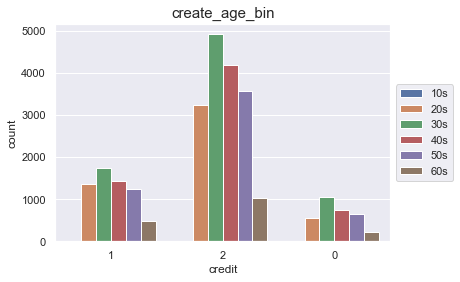

In [58]:
temp_df = pd.merge(df_all_r["create_age_bin"], y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue="create_age_bin", data=temp_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("create_age_bin", fontsize=15)
plt.show()

In [59]:
df_all_r = pd.merge(df_all_r, pd.get_dummies(df_all_r[["create_age_bin"]]), left_index=True, right_index=True)

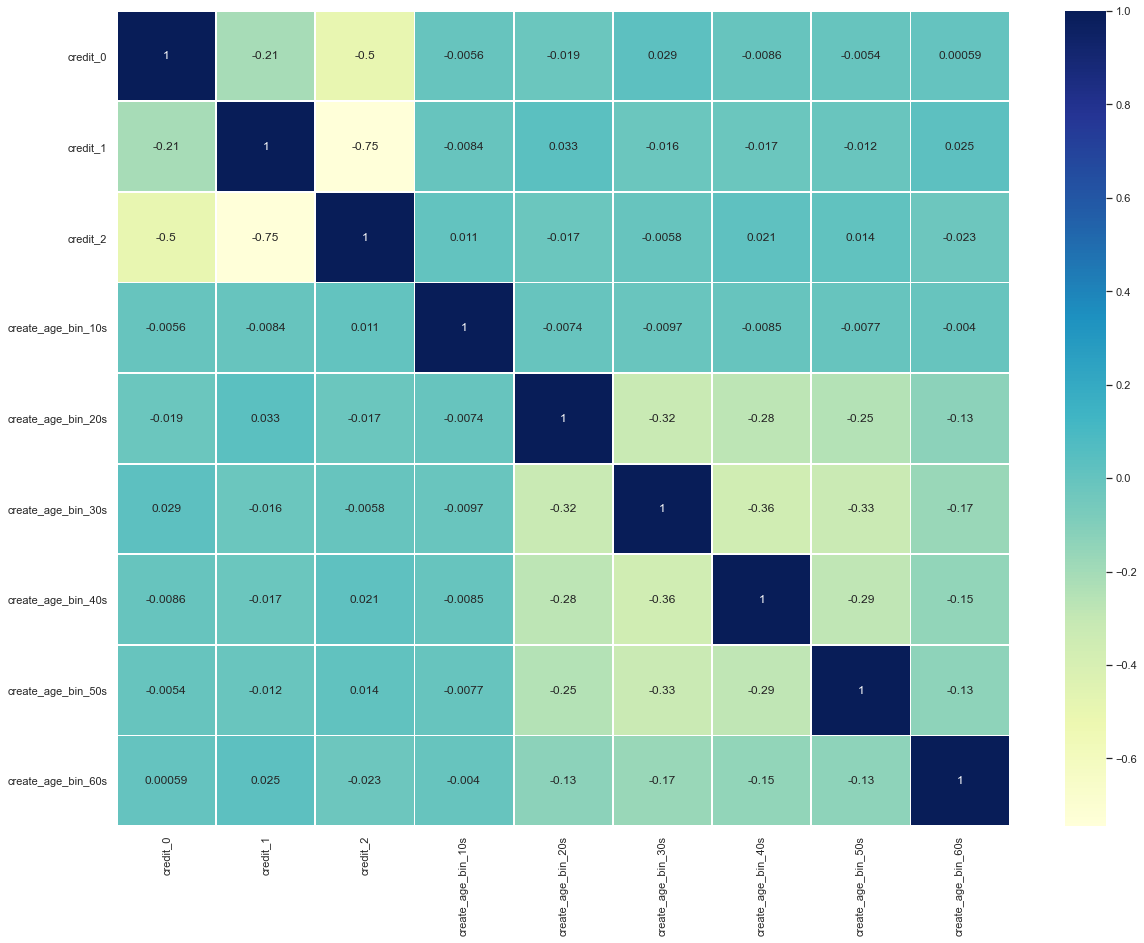

In [60]:
temp_df = pd.merge(y_train_data_onehot, pd.get_dummies(df_all_r[["create_age_bin"]]), left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

### Mean 인코딩 해보기

In [61]:
temp_df = pd.merge(df_all_r["create_age_bin"], y_train_data_onehot, left_index=True, right_index=True)

print(temp_df.groupby("create_age_bin")['credit_0'].mean(), "\n")
print(temp_df.groupby("create_age_bin")['credit_1'].mean(), "\n")
print(temp_df.groupby("create_age_bin")['credit_2'].mean())

create_age_bin
10s    0.000000
20s    0.109348
30s    0.136570
40s    0.116797
50s    0.118356
60s    0.122520
Name: credit_0, dtype: float64 

create_age_bin
10s    0.000000
20s    0.265725
30s    0.226408
40s    0.223705
50s    0.227215
60s    0.277713
Name: credit_1, dtype: float64 

create_age_bin
10s    1.000000
20s    0.624927
30s    0.637023
40s    0.659498
50s    0.654429
60s    0.599767
Name: credit_2, dtype: float64


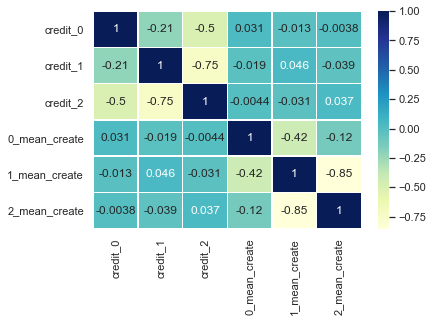

In [62]:
temp_df["0_mean_create"] = temp_df["create_age_bin"].replace(temp_df.groupby("create_age_bin")["credit_0"].mean())
temp_df["1_mean_create"] = temp_df["create_age_bin"].replace(temp_df.groupby("create_age_bin")["credit_1"].mean())
temp_df["2_mean_create"] = temp_df["create_age_bin"].replace(temp_df.groupby("create_age_bin")["credit_2"].mean())

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True,  linewidths=.5, cmap="YlGnBu")

### Ordinal Encoding 해보기

In [63]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
temp_df = ordinal_encoder.fit_transform(df_all_r[["create_age_bin"]])
df_all_r["create_age_ordinal"] = temp_df

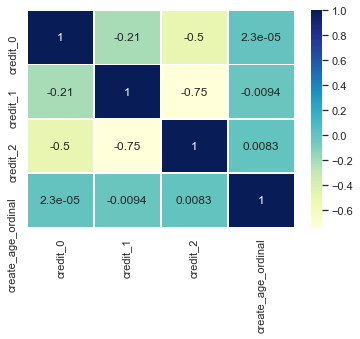

In [64]:
temp_df = pd.merge(y_train_data_onehot, df_all_r[["create_age_ordinal"]], left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

## 연간 소득 / 가족 규모 or 자녀의 수 가 높을 수록 신용등급이 좋다?

In [65]:
df_all_r["income/family"] = df_all_r["income_total"] / df_all_r["family_size"]
df_all_r["income/child"] = df_all_r["income_total"] / (df_all_r["child_num"] + 1)

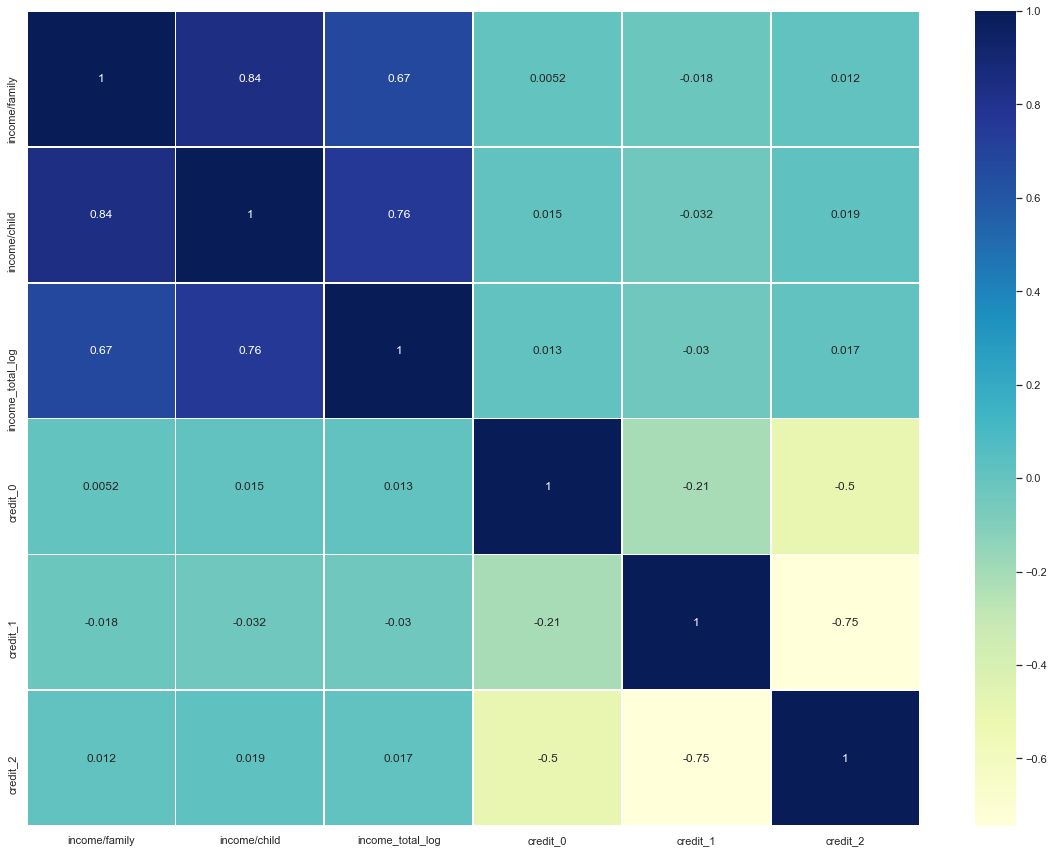

In [66]:
corr = pd.merge(df_all_r[["income/family", "income/child", "income_total_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

## 차량, 부동산, 업무용 핸드폰, 전화, 이메일 이 6가지 항목 중에 소유 항목 개수가 많을수록 신용도 높다?

In [67]:
main_df_r[["car", "reality","work_phone","phone","email"]]

car reality work_phone phone email
0       N       N          N     N     N
1       N       Y          N     N     Y
2       Y       Y          N     Y     N
3       N       Y          N     Y     N
4       Y       Y          N     N     N
...    ..     ...        ...   ...   ...
36452   Y       Y          Y     Y     N
36453   Y       Y          Y     N     N
36454   N       Y          N     N     N
36455   Y       N          N     Y     N
36456   N       Y          N     N     Y

[36457 rows x 5 columns]

In [68]:
temp_df = main_df_r[["car", "reality","work_phone","phone","email"]]

df_all_r["num_crwpe"] = temp_df.apply(lambda x: x.value_counts(), axis=1).fillna(0).astype(int)["Y"]

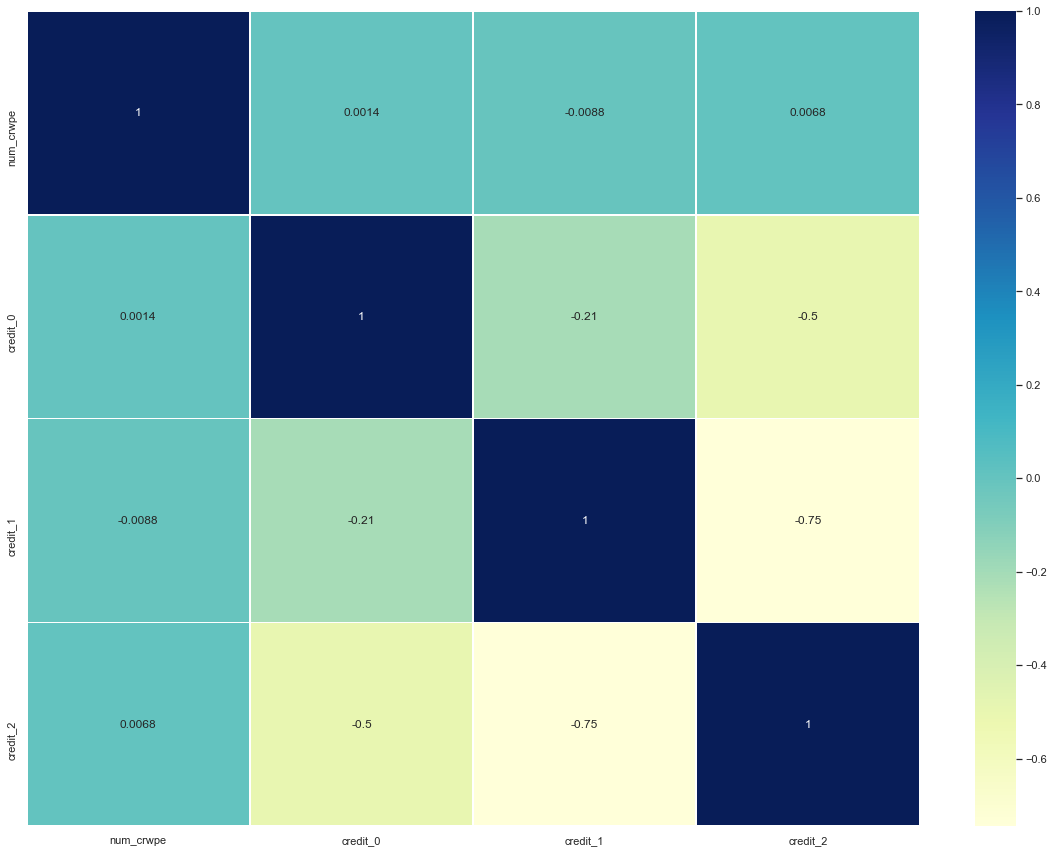

In [69]:
temp_df = pd.merge(df_all_r[["num_crwpe"]], y_train_data_onehot, left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

## begin_month 에 따른 각각의 바이올린 플롯

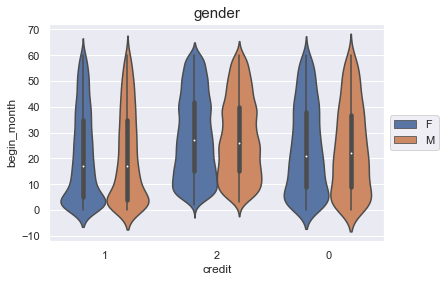

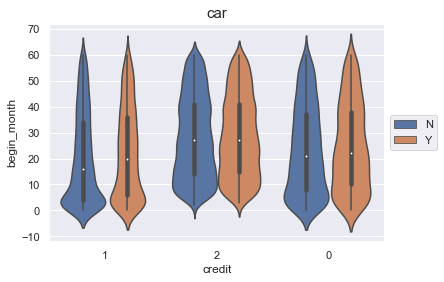

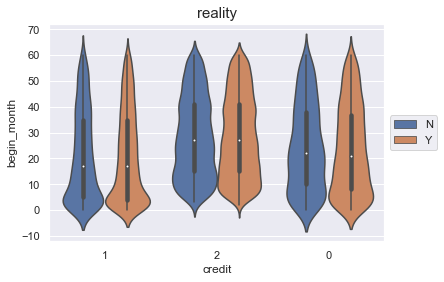

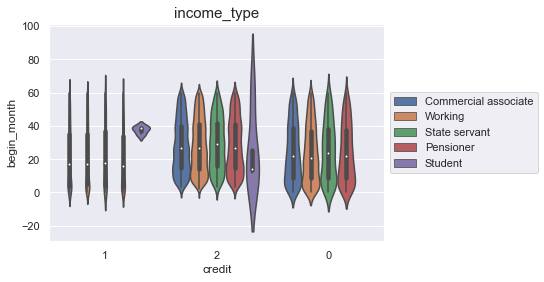

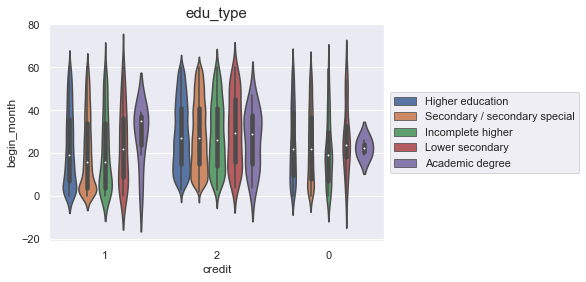

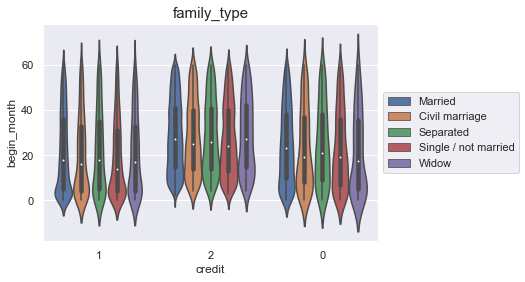

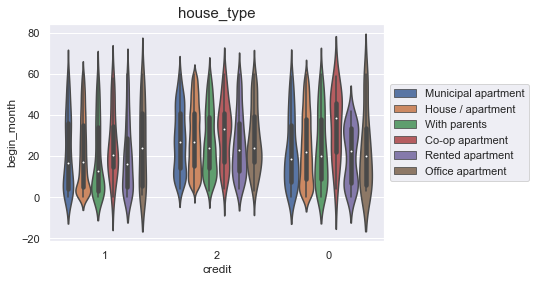

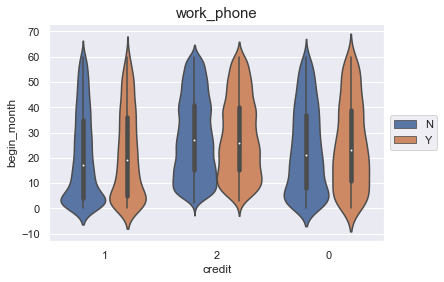

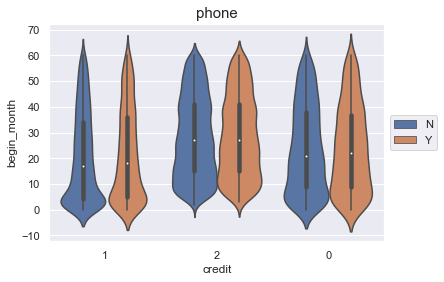

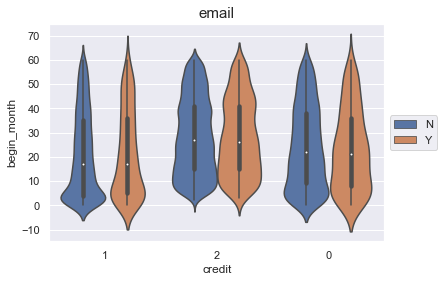

In [70]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)

for col_name in object_col:
    sns.violinplot(x="credit", y="begin_month", hue=col_name, data=temp_df, split=False)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(col_name, fontsize=15)
    plt.show()

<AxesSubplot:xlabel='begin_month', ylabel='income_total'>

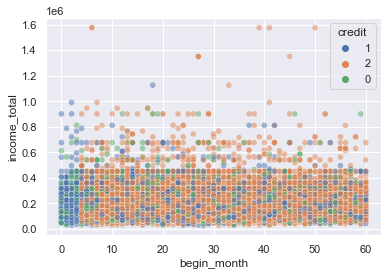

In [71]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)
sns.scatterplot(x="begin_month", y="income_total",hue="credit", data=temp_df, alpha=0.5)

<AxesSubplot:xlabel='family_type', ylabel='income_total'>

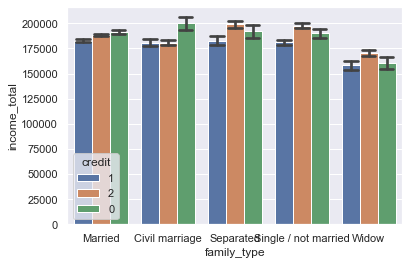

In [72]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)

sns.barplot(x="family_type", y="income_total", hue="credit", data=temp_df, ci=68, capsize=.2)

<AxesSubplot:xlabel='edu_type', ylabel='income_total'>

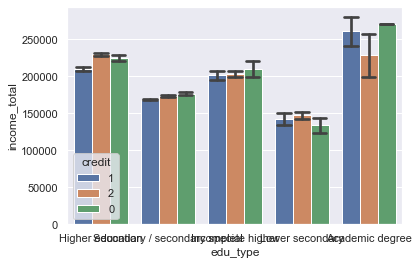

In [73]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)

sns.barplot(x="edu_type", y="income_total", hue="credit", data=temp_df, ci=68, capsize=.2)

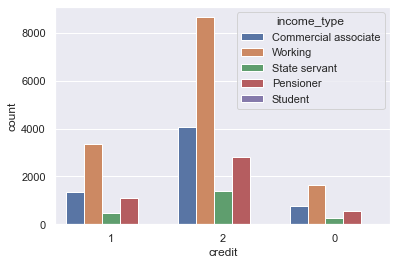

In [74]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue='income_type', data=temp_df)
plt.show()

In [75]:
temp_df = pd.merge(main_df_r, y_train_data, left_index=True, right_index=True)
pd.DataFrame(temp_df.groupby(["income_type","edu_type","credit"]).size())

0
income_type          edu_type                      credit      
Commercial associate Academic degree               0          2
                                                   1          5
                                                   2          3
                     Higher education              0        295
                                                   1        450
                                                   2       1419
                     Incomplete higher             0         33
                                                   1         80
                                                   2        216
                     Lower secondary               0          4
                                                   1          7
                                                   2         15
                     Secondary / secondary special 0        448
                                                   1        802
                                                   2       2423
Pensioner            Academic degree               2          1
                     Higher education              0         99
                                                   1        202
                                                   2        436
                     Incomplete higher             1         13
                                                   2         32
                     Lower secondary               0         14
                                                   1         24
                                                   2         68
                     Secondary / secondary special 0        423
                                                   1        845
                                                   2       2292
State servant        Higher education              0        119
                                                   1        203
                                                   2        585
                     Incomplete higher             0          4
                                                   1         16
                                                   2         42
                     Lower secondary               0          1
                                                   1          1
                                                   2          6
                     Secondary / secondary special 0        141
                                                   1        269
                                                   2        767
Student              Higher education              1          3
                                                   2          2
                     Secondary / secondary special 2          2
Working              Academic degree               1          2
                                                   2         10
                     Higher education              0        396
                                                   1        893
                                                   2       2060
                     Incomplete higher             0         77
                                                   1        137
                                                   2        370
                     Lower secondary               0          9
                                                   1         27
                                                   2         81
                     Secondary / secondary special 0       1157
                                                   1       2288
                                                   2       6138

## Standardization 과 Min-Max Normalization 해보기

In [76]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(df_all_r[['income_total','income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero","family_size_log"]])
df_std = std_scaler.transform(df_all_r[['income_total','income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero","family_size_log"]])

df_all_r[['income_total_std','income/child_std' ,"DAYS_BIRTH_std", "begin_month_std","EMPLOYED_UP_zero_std","family_size_log_std"]] = df_std

In [77]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df_all_r[['income_total','income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero","family_size_log"]])
df_min_max = minmax_scaler.transform(df_all_r[['income_total','income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero","family_size_log"]])

df_all_r[['income_total_mm','income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm", "EMPLOYED_UP_zero_mm","family_size_log_mm"]] = df_min_max

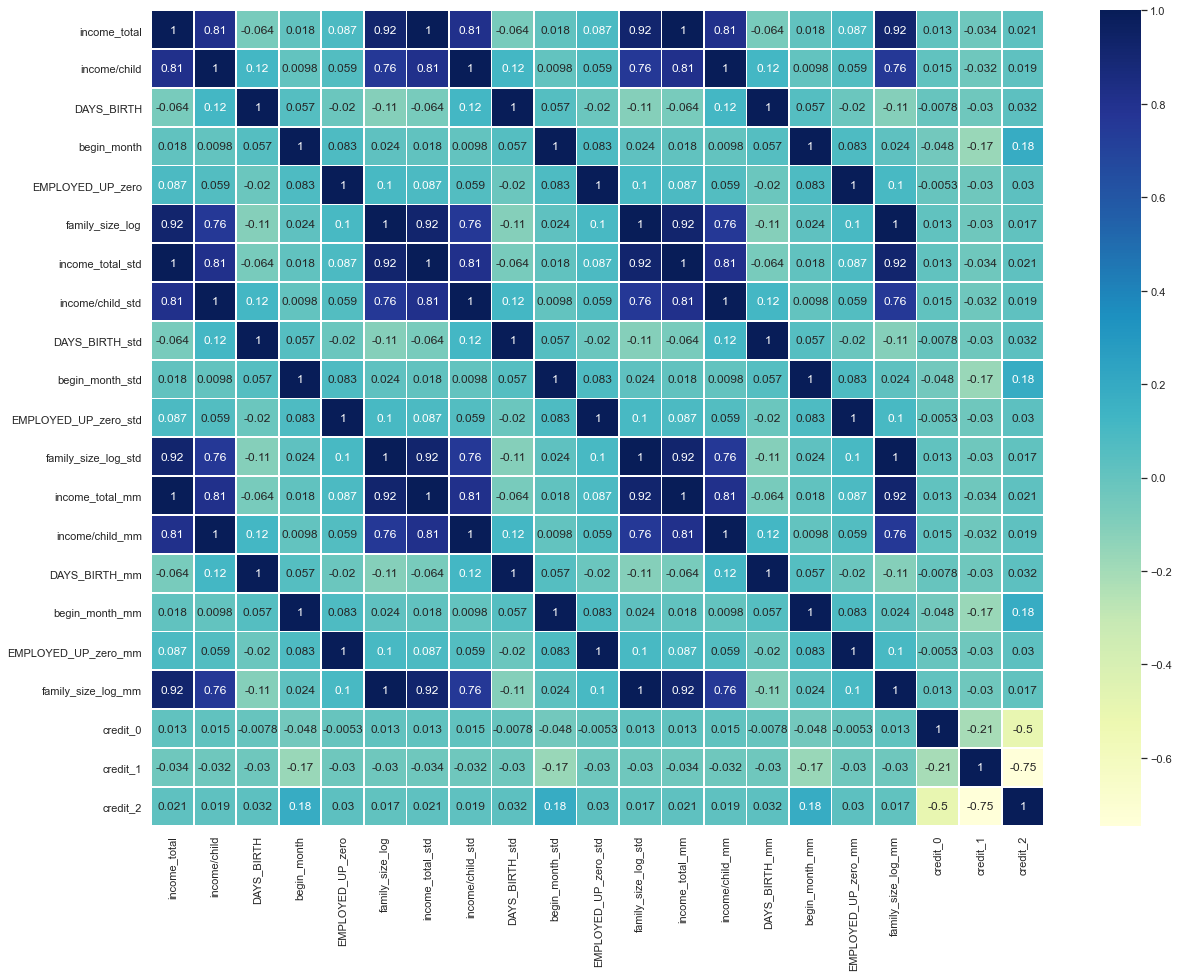

In [78]:
temp_df = df_all_r[['income_total','income/child' ,"DAYS_BIRTH", "begin_month","EMPLOYED_UP_zero","family_size_log",
          'income_total_std','income/child_std' ,"DAYS_BIRTH_std", "begin_month_std","EMPLOYED_UP_zero_std","family_size_log_std",
         'income_total_mm','income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm","EMPLOYED_UP_zero_mm","family_size_log_mm"]]

corr = pd.merge(temp_df, y_train_data_onehot, left_index=True, right_index=True).corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- feature sclaing을 한 것과 안한것의 상관관계 차이는 없음.

# 데이터 마무리

In [79]:
main_df_r.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month'],
      dtype='object')

In [80]:
df_all_r.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month',
       'gender_F', 'gender_M', 'car_N', 'car_Y', 'reality_N', 'reality_Y',
       'work_phone_N', 'work_phone_Y', 'phone_N', 'phone_Y', 'email_N',
       'email_Y', 'income_type_Commercial associate', 'income_type_Pensioner',
       'income_type_State servant', 'income_type_Student',
       'income_type_Working', 'edu_type_Academic degree',
       'edu_type_Higher education', 'edu_type_Incomplete higher',
       'edu_type_Lower secondary', 'edu_type_Secondary / secondary special',
       'family_type_Civil marriage', 'family_type_Married',
       'family_type_Separated', 'family_type_Single / not married',
       'family_type_Widow', 'house_type_Co-op apartment',
       'house_type_House / apartment', 'house_type_Municipal apartment',
       'house_type_Office ap

In [81]:
final_all_df = df_all_r.copy(deep=True)

In [82]:
elimination_feature = ['gender', 'car', 'reality','income_type', 'edu_type', 'family_type', 'house_type','work_phone', 'phone', 
                       'email',"is_employed",'create_age',"create_age_bin",'income_total_log', 'DAYS_EMPLOYED_log','child_num_log',
                      'EMPLOYED_UP', 'EMPLOYED_UP_log','EMPLOYED_UP_zero_log', 'EMPLOYED_UP_mean', 'EMPLOYED_UP_mean_log', 'income/family',
                       'EMPLOYED_UP_max', 'EMPLOYED_UP_max_log', 'EMPLOYED_UP_mode','EMPLOYED_UP_mode_log','family_size', 'DAYS_EMPLOYED']
for col_name in elimination_feature:
    final_all_df.drop(col_name, axis=1, inplace=True)

In [83]:
final_all_df_base = final_all_df.drop(['income_total_std','income/child_std' ,"DAYS_BIRTH_std", "begin_month_std", "EMPLOYED_UP_zero_std","family_size_log_std",
               'income_total_mm','income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm", "EMPLOYED_UP_zero_mm","family_size_log_mm"], axis=1)

In [84]:
final_all_df_std = final_all_df.drop(['income_total','income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero","family_size_log",
               'income_total_mm','income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm", "EMPLOYED_UP_zero_mm","family_size_log_mm"], axis=1)

In [85]:
final_all_df_mm = final_all_df.drop(['income_total','income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero","family_size_log",
               'income_total_std','income/child_std' ,"DAYS_BIRTH_std", "begin_month_std", "EMPLOYED_UP_zero_std","family_size_log_std"], axis=1)

## 특성 뽑아내기

### 1. base

In [86]:
X_train = final_all_df_base[:number_of_train_data].values
X_test = final_all_df_base[number_of_train_data:].values
y_train = y_train_data.copy()

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select_base = RFE(RandomForestClassifier(n_estimators=100))
select_base.fit(X_train, y_train)

final_selected_base = select_base.transform(final_all_df_base)
final_selected_base.shape

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A c

(36457, 25)

In [87]:
final_all_df_base.columns[select_base.get_support()]

Index(['child_num', 'income_total', 'DAYS_BIRTH', 'begin_month', 'gender_F',
       'gender_M', 'car_N', 'car_Y', 'reality_N', 'reality_Y', 'work_phone_Y',
       'phone_N', 'phone_Y', 'income_type_Commercial associate',
       'income_type_Working', 'edu_type_Higher education',
       'edu_type_Secondary / secondary special', 'family_type_Married',
       'house_type_House / apartment', 'family_size_log', 'EMPLOYED_UP_zero',
       'create_age_bin_40s', 'create_age_ordinal', 'income/child',
       'num_crwpe'],
      dtype='object')

### 2. standardization

In [88]:
X_train = final_all_df_std[:number_of_train_data].values
X_test = final_all_df_std[number_of_train_data:].values
y_train = y_train_data.copy()

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select_std = RFE(RandomForestClassifier(n_estimators=100))
select_std.fit(X_train, y_train)

final_selected_std = select_std.transform(final_all_df_std)
final_selected_std.shape

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A c

(36457, 25)

In [89]:
final_all_df_std.columns[select_std.get_support()]

Index(['child_num', 'gender_F', 'gender_M', 'car_N', 'car_Y', 'reality_N',
       'reality_Y', 'work_phone_Y', 'phone_N', 'phone_Y',
       'income_type_Commercial associate', 'income_type_Working',
       'edu_type_Higher education', 'edu_type_Secondary / secondary special',
       'family_type_Married', 'family_type_Single / not married',
       'house_type_House / apartment', 'create_age_ordinal', 'num_crwpe',
       'income_total_std', 'income/child_std', 'DAYS_BIRTH_std',
       'begin_month_std', 'EMPLOYED_UP_zero_std', 'family_size_log_std'],
      dtype='object')

### 3. min-max scailing

In [90]:
X_train = final_all_df_mm[:number_of_train_data].values
X_test = final_all_df_mm[number_of_train_data:].values
y_train = y_train_data.copy()

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select_mm = RFE(RandomForestClassifier(n_estimators=100))
select_mm.fit(X_train, y_train)

final_selected_mm = select_mm.transform(final_all_df_mm)
final_selected_mm.shape

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A c

(36457, 25)

In [91]:
final_all_df_mm.columns[select_mm.get_support()]

Index(['child_num', 'gender_F', 'gender_M', 'car_N', 'car_Y', 'reality_N',
       'reality_Y', 'work_phone_N', 'phone_N', 'phone_Y',
       'income_type_Commercial associate', 'income_type_Working',
       'edu_type_Higher education', 'edu_type_Secondary / secondary special',
       'family_type_Married', 'house_type_House / apartment',
       'create_age_bin_40s', 'create_age_ordinal', 'num_crwpe',
       'income_total_mm', 'income/child_mm', 'DAYS_BIRTH_mm', 'begin_month_mm',
       'EMPLOYED_UP_zero_mm', 'family_size_log_mm'],
      dtype='object')

# training

## RandomForestClassifier

In [92]:
final_selected_base_df = pd.DataFrame(final_selected_base)
final_selected_std_df = pd.DataFrame(final_selected_std)
final_selected_mm_df = pd.DataFrame(final_selected_mm)

### Grid Search

In [111]:
X_train = final_selected_base_df[:number_of_train_data]
y_train = y_train_data.copy()

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 50, 100, 150],
           'max_depth' : [6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
           'min_samples_leaf' : [2, 4, 6, 8, 10],
           'min_samples_split' : [2, 4, 6, 10, 14]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:  {'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
최고 예측 정확도: 0.7150


### Randomized Search

In [112]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint 
param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_depth' : randint(low=10, high=30),
    'min_samples_leaf' : randint(low=1, high=15),
    'min_samples_split' : randint(low=1, high=30),
} 

# forest_reg = RandomForestRegressor() 
forest_reg = RandomForestClassifier()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=50, cv=5, 
                                scoring='neg_mean_squared_error', random_state=42) 
rnd_search.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', rnd_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(rnd_search.best_score_))

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zxwlg\miniconda3\envs\data_science

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

최적 하이퍼 파라미터:  {'max_depth': 24, 'min_samples_leaf': 3, 'min_samples_split': 14, 'n_estimators': 81}
최고 예측 정확도: -0.5878


### Grid Search  값 사용
### 1. base_Grid

In [128]:
train_x = final_selected_base_df[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state = 42)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf_base_grid=RandomForestClassifier(max_depth=24, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
clf_base_grid.fit(X_train, y_train)
y_pred=clf_base_grid.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 25)
(19842, 1)
Validation set: 
(6615, 25)
(6615, 1)


<ipython-input-128-07f1d783cc37>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_base_grid.fit(X_train, y_train)


log_loss: 0.71941461973915


In [129]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_selected_base_df[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission_base_grid = run_kfold(clf_base_grid)

<ipython-input-129-2f7ddb7eec9e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.7065610351884407


<ipython-input-129-2f7ddb7eec9e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.7206034276949713


<ipython-input-129-2f7ddb7eec9e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.7170036995226


<ipython-input-129-2f7ddb7eec9e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.7145427534256896


<ipython-input-129-2f7ddb7eec9e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.7183958908711403
Mean:0.7154213613405684


### 2. standardization_Grid

In [126]:
train_x = final_selected_std_df[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state = 42)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf_std_grid=RandomForestClassifier(max_depth=24, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
clf_std_grid.fit(X_train, y_train)
y_pred=clf_std_grid.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 25)
(19842, 1)
Validation set: 
(6615, 25)
(6615, 1)


<ipython-input-126-7484277ed701>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_std_grid.fit(X_train, y_train)


log_loss: 0.720643595531289


In [127]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_selected_std_df[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission_std_grid = run_kfold(clf_std_grid)

<ipython-input-127-4e5f3042a3ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.7029180442731245


<ipython-input-127-4e5f3042a3ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.716757815021825


<ipython-input-127-4e5f3042a3ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.714614138194979


<ipython-input-127-4e5f3042a3ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.7140963820314342


<ipython-input-127-4e5f3042a3ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.7155051236104614
Mean:0.7127783006263648


### 3. min-max scailing_Grid

In [130]:
train_x = final_selected_mm_df[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state = 42)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf_mm_grid=RandomForestClassifier(max_depth=24, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
clf_mm_grid.fit(X_train, y_train)
y_pred=clf_mm_grid.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 25)
(19842, 1)
Validation set: 
(6615, 25)
(6615, 1)


<ipython-input-130-0459beacf75d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_mm_grid.fit(X_train, y_train)


log_loss: 0.723306081798733


In [131]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_selected_mm_df[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission_mm_grid = run_kfold(clf_mm_grid)

<ipython-input-131-6db11c2c1def>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.705499851145641


<ipython-input-131-6db11c2c1def>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.7182375693367257


<ipython-input-131-6db11c2c1def>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.7164440135138551


<ipython-input-131-6db11c2c1def>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.7123591869392143


<ipython-input-131-6db11c2c1def>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.7167900310609199
Mean:0.713866130399271


### Randomized Search 값 사용
### 1. base_Random

In [132]:
train_x = final_selected_base_df[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state = 42)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf_base_rnd=RandomForestClassifier(max_depth=24, min_samples_leaf=3, min_samples_split=14, n_estimators=81)
clf_base_rnd.fit(X_train, y_train)
y_pred=clf_base_rnd.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 25)
(19842, 1)
Validation set: 
(6615, 25)
(6615, 1)


<ipython-input-132-65a87b936a59>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_base_rnd.fit(X_train, y_train)


log_loss: 0.7313417202209481


In [133]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_selected_base_df[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission_base_rnd = run_kfold(clf_base_rnd)

<ipython-input-133-a8f6ba771703>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.718081316150814


<ipython-input-133-a8f6ba771703>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.727953231097574


<ipython-input-133-a8f6ba771703>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.7270584494169365


<ipython-input-133-a8f6ba771703>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.7284207657357118


<ipython-input-133-a8f6ba771703>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.7292943003687794
Mean:0.7261616125539632


### 2. standardization_Random

In [134]:
train_x = final_selected_std_df[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state = 42)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf_std_rnd=RandomForestClassifier(max_depth=24, min_samples_leaf=3, min_samples_split=14, n_estimators=81)
clf_std_rnd.fit(X_train, y_train)
y_pred=clf_std_rnd.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 25)
(19842, 1)
Validation set: 
(6615, 25)
(6615, 1)


<ipython-input-134-0e650fb14e78>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_std_rnd.fit(X_train, y_train)


log_loss: 0.7309997601942185


In [135]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_selected_std_df[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission_std_rnd = run_kfold(clf_std_rnd)

<ipython-input-135-d64f6c6d2d1c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.7183177144345677


<ipython-input-135-d64f6c6d2d1c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.7279443889395499


<ipython-input-135-d64f6c6d2d1c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.7253317871441538


<ipython-input-135-d64f6c6d2d1c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.7259743173409361


<ipython-input-135-d64f6c6d2d1c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.7252749371390498
Mean:0.7245686289996514


### 3. min-max scailing_Random

In [136]:
train_x = final_selected_mm_df[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state = 42)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf_mm_rnd=RandomForestClassifier(max_depth=24, min_samples_leaf=3, min_samples_split=14, n_estimators=81)
clf_mm_rnd.fit(X_train, y_train)
y_pred=clf_mm_rnd.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 25)
(19842, 1)
Validation set: 
(6615, 25)
(6615, 1)


<ipython-input-136-e1b39c34aa1c>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_mm_rnd.fit(X_train, y_train)


log_loss: 0.7311103880621832


In [137]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_selected_mm_df[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission_mm_rnd = run_kfold(clf_mm_rnd)

<ipython-input-137-6bedc09a120c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.7190841003146993


<ipython-input-137-6bedc09a120c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.7268570732849988


<ipython-input-137-6bedc09a120c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.7286735359799571


<ipython-input-137-6bedc09a120c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.7264588183258629


<ipython-input-137-6bedc09a120c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.7275114177505813
Mean:0.7257169891312198


## LGBM

In [99]:
train = pd.merge(final_selected_std_df[:number_of_train_data], y_train_data, left_index=True, right_index=True)

In [100]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train, train['credit']):
    folds.append((train_idx, valid_idx))

In [101]:
from lightgbm import LGBMClassifier
import random
random.seed(42)
lgb_models={}
for fold in range(5):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train.drop(['credit'],axis=1).iloc[train_idx].values, train.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train['credit'][train_idx].values, train['credit'][valid_idx].values 
    lgb = LGBMClassifier(n_estimators=1000)
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=30,
           verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')


====================================1============================================
Training until validation scores don't improve for 30 rounds
[100]	training's multi_logloss: 0.646425	valid_1's multi_logloss: 0.744819
[200]	training's multi_logloss: 0.559625	valid_1's multi_logloss: 0.72788
[300]	training's multi_logloss: 0.496712	valid_1's multi_logloss: 0.720642
[400]	training's multi_logloss: 0.444211	valid_1's multi_logloss: 0.717826
Early stopping, best iteration is:
[374]	training's multi_logloss: 0.455938	valid_1's multi_logloss: 0.717591


====================================2============================================
Training until validation scores don't improve for 30 rounds
[100]	training's multi_logloss: 0.643294	valid_1's multi_logloss: 0.765624
[200]	training's multi_logloss: 0.553327	valid_1's multi_logloss: 0.752085
Early stopping, best iteration is:
[241]	training's multi_logloss: 0.524491	valid_1's multi_logloss: 0.749743


====================================3====

# submission

In [138]:
my_submission_std_grid

array([[0.10645717, 0.17836672, 0.71517611],
       [0.23904433, 0.21985608, 0.54109958],
       [0.0484653 , 0.08878882, 0.86274589],
       ...,
       [0.01284054, 0.09821698, 0.88894248],
       [0.19937576, 0.37905182, 0.42157242],
       [0.14641311, 0.23659816, 0.61698873]])

In [139]:
submission=pd.read_csv('./data/sample_submission.csv')

submission

index  0  1  2
0     26457  0  0  0
1     26458  0  0  0
2     26459  0  0  0
3     26460  0  0  0
4     26461  0  0  0
...     ... .. .. ..
9995  36452  0  0  0
9996  36453  0  0  0
9997  36454  0  0  0
9998  36455  0  0  0
9999  36456  0  0  0

[10000 rows x 4 columns]

In [140]:
submission.loc[:,1:]=my_submission_std

submission

<ipython-input-140-413fad78acba>:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  submission.loc[:,1:]=my_submission_std


index         0         1         2
0     26457  0.102001  0.198141  0.699858
1     26458  0.187785  0.226261  0.585954
2     26459  0.067800  0.115011  0.817189
3     26460  0.102744  0.132052  0.765204
4     26461  0.135177  0.201689  0.663134
...     ...       ...       ...       ...
9995  36452  0.106665  0.227431  0.665904
9996  36453  0.182281  0.274491  0.543228
9997  36454  0.026969  0.113035  0.859996
9998  36455  0.183055  0.327898  0.489046
9999  36456  0.140858  0.213254  0.645889

[10000 rows x 4 columns]

In [141]:
submission.to_csv('./data/9_submission_RFC.csv', index=False)